# Dense intervalos - datos 10 dias

# Intervalos 1:

Cargamos los datos:

In [1]:
run 10dias-porintervalos1.ipynb

# Conjunto de datos 1

Construimos el modelo:

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.metrics import confusion_matrix,balanced_accuracy_score,classification_report

In [3]:
def subida(list):
    resultado = []
    for i in range(1,len(list)):
        if  (list)[i] > (list)[i-1]:
            resultado.append(1)
        else:
            resultado.append(0)
    return resultado

def acierto(list1,list2):
    sum = 0
    for i in range(0,len(list1)):
        if(list1[i]==list2[i]):
            sum = sum +1
    a = sum/len(list1)
    return a


### Dense RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

In [4]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 12, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(7, activation='softmax'))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

Modelo 100 neuronas:

In [5]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1300      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 33)                1683      
                                                                 
 dense_3 (Dense)             (None, 25)                850       
                                                                 
 dense_4 (Dense)             (None, 7)                 182       
                                                                 
Total params: 9,065
Trainable params: 9,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] - 2

In [6]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.5490716180371353
Tasa de aciertos balanceada regresión logística: 0.55
Matriz de confusión:
[[59 15  2  1  0  0]
 [17 22 11 11  1  0]
 [11 10 19 29  3  0]
 [ 3  2  4 58 11  2]
 [ 0  0  1 21 23  7]
 [ 0  0  0  4  4 26]]
              precision    recall  f1-score   support

         1.0       0.66      0.77      0.71        77
         2.0       0.45      0.35      0.40        62
         3.0       0.51      0.26      0.35        72
         4.0       0.47      0.72      0.57        80
         5.0       0.55      0.44      0.49        52
         6.0       0.74      0.76      0.75        34

    accuracy                           0.55       377
   macro avg       0.56      0.55      0.54       377
weighted avg       0.55      0.55      0.53       377



Modelo 64 neuronas

In [7]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                832       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 21)                693       
                                                                 
 dense_8 (Dense)             (None, 16)                352       
                                                                 
 dense_9 (Dense)             (None, 7)                 119       
                                                                 
Total params: 4,076
Trainable params: 4,076
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] -

In [8]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.2519893899204244
Tasa de aciertos balanceada regresión logística: 0.28
Matriz de confusión:
[[ 0  0  0 77  0  0]
 [ 0  0  0 61  0  1]
 [ 0  0  2 68  0  2]
 [ 0  0  1 65  0 14]
 [ 0  0  0 29  0 23]
 [ 0  0  0  6  0 28]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        62
         3.0       0.67      0.03      0.05        72
         4.0       0.21      0.81      0.34        80
         5.0       0.00      0.00      0.00        52
         6.0       0.41      0.82      0.55        34

    accuracy                           0.25       377
   macro avg       0.22      0.28      0.16       377
weighted avg       0.21      0.25      0.13       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [9]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                416       
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 11)                187       
                                                                 
 dense_13 (Dense)            (None, 8)                 96        
                                                                 
 dense_14 (Dense)            (None, 7)                 63        
                                                                 
Total params: 1,290
Trainable params: 1,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] -

In [10]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.09018567639257294
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[59 15  2  1  0  0]
 [17 22 11 11  1  0]
 [11 10 19 29  3  0]
 [ 3  2  4 58 11  2]
 [ 0  0  1 21 23  7]
 [ 0  0  0  4  4 26]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00        72
         4.0       0.00      0.00      0.00        80
         5.0       0.00      0.00      0.00        52
         6.0       0.09      1.00      0.17        34

    accuracy                           0.09       377
   macro avg       0.02      0.17      0.03       377
weighted avg       0.01      0.09      0.01       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [11]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 12, activation=activation_fun))
    model.add(Dense(round(neurons), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

In [12]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               1300      
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 50)                2550      
                                                                 
 dense_19 (Dense)            (None, 7)                 357       
                                                                 
Total params: 19,357
Trainable params: 19,357
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================]

In [13]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.20424403183023873
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[77  0  0  0  0  0]
 [62  0  0  0  0  0]
 [72  0  0  0  0  0]
 [80  0  0  0  0  0]
 [52  0  0  0  0  0]
 [34  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.20      1.00      0.34        77
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00        72
         4.0       0.00      0.00      0.00        80
         5.0       0.00      0.00      0.00        52
         6.0       0.00      0.00      0.00        34

    accuracy                           0.20       377
   macro avg       0.03      0.17      0.06       377
weighted avg       0.04      0.20      0.07       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [14]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                832       
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 32)                1056      
                                                                 
 dense_24 (Dense)            (None, 7)                 231       
                                                                 
Total params: 8,359
Trainable params: 8,359
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] -

In [15]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.1856763925729443
Tasa de aciertos balanceada regresión logística: 0.18
Matriz de confusión:
[[ 0 72  5  0  0  0]
 [ 0 55  7  0  0  0]
 [ 0 57 15  0  0  0]
 [ 0 61 19  0  0  0]
 [ 0 44  8  0  0  0]
 [ 0 31  3  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.17      0.89      0.29        62
         3.0       0.26      0.21      0.23        72
         4.0       0.00      0.00      0.00        80
         5.0       0.00      0.00      0.00        52
         6.0       0.00      0.00      0.00        34

    accuracy                           0.19       377
   macro avg       0.07      0.18      0.09       377
weighted avg       0.08      0.19      0.09       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [16]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                416       
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dense_28 (Dense)            (None, 16)                272       
                                                                 
 dense_29 (Dense)            (None, 7)                 119       
                                                                 
Total params: 2,391
Trainable params: 2,391
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] -

In [17]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.16180371352785147
Tasa de aciertos balanceada regresión logística: 0.16
Matriz de confusión:
[[77  0  0  0  0  0]
 [62  0  0  0  0  0]
 [72  0  0  0  0  0]
 [80  0  0  0  0  0]
 [52  0  0  0  0  0]
 [34  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.12      0.21      0.15        77
         2.0       0.19      0.73      0.30        62
         3.0       0.00      0.00      0.00        72
         4.0       0.00      0.00      0.00        80
         5.0       0.00      0.00      0.00        52
         6.0       0.00      0.00      0.00        34

    accuracy                           0.16       377
   macro avg       0.05      0.16      0.07       377
weighted avg       0.05      0.16      0.08       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### EXPERIMENTO 3: Modelo 10 capas

In [18]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 12, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(round(neurons/5), activation=activation_fun))
    model.add(Dense(round(neurons/6), activation=activation_fun))
    model.add(Dense(round(neurons/7), activation=activation_fun))
    model.add(Dense(round(neurons/8), activation=activation_fun))
    model.add(Dense(round(neurons/9), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model


Modelo 100 neuronas:

In [19]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               1300      
                                                                 
 dense_31 (Dense)            (None, 50)                5050      
                                                                 
 dense_32 (Dense)            (None, 33)                1683      
                                                                 
 dense_33 (Dense)            (None, 25)                850       
                                                                 
 dense_34 (Dense)            (None, 20)                520       
                                                                 
 dense_35 (Dense)            (None, 17)                357       
                                                                 
 dense_36 (Dense)            (None, 14)               

In [20]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [77  0  0  0  0  0  0]
 [62  0  0  0  0  0  0]
 [72  0  0  0  0  0  0]
 [80  0  0  0  0  0  0]
 [52  0  0  0  0  0  0]
 [34  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      77.0
         2.0       0.00      0.00      0.00      62.0
         3.0       0.00      0.00      0.00      72.0
         4.0       0.00      0.00      0.00      80.0
         5.0       0.00      0.00      0.00      52.0
         6.0       0.00      0.00      0.00      34.0

    accuracy                           0.00     377.0
   macro avg       0.00      0.00      0.00     377.0
weighted avg       0.00      0.00      0.00     377.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas:

In [21]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                832       
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 21)                693       
                                                                 
 dense_43 (Dense)            (None, 16)                352       
                                                                 
 dense_44 (Dense)            (None, 13)                221       
                                                                 
 dense_45 (Dense)            (None, 11)                154       
                                                                 
 dense_46 (Dense)            (None, 9)                

In [22]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.09018567639257294
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0  0  0  0  0 77]
 [ 0  0  0  0  0 62]
 [ 0  0  0  0  0 72]
 [ 0  0  0  0  0 80]
 [ 0  0  0  0  0 52]
 [ 0  0  0  0  0 34]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00        72
         4.0       0.00      0.00      0.00        80
         5.0       0.00      0.00      0.00        52
         6.0       0.09      1.00      0.17        34

    accuracy                           0.09       377
   macro avg       0.02      0.17      0.03       377
weighted avg       0.01      0.09      0.01       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [23]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 32)                416       
                                                                 
 dense_51 (Dense)            (None, 16)                528       
                                                                 
 dense_52 (Dense)            (None, 11)                187       
                                                                 
 dense_53 (Dense)            (None, 8)                 96        
                                                                 
 dense_54 (Dense)            (None, 6)                 54        
                                                                 
 dense_55 (Dense)            (None, 5)                 35        
                                                                 
 dense_56 (Dense)            (None, 5)                

In [24]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [77  0  0  0  0  0  0]
 [62  0  0  0  0  0  0]
 [72  0  0  0  0  0  0]
 [80  0  0  0  0  0  0]
 [52  0  0  0  0  0  0]
 [34  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      77.0
         2.0       0.00      0.00      0.00      62.0
         3.0       0.00      0.00      0.00      72.0
         4.0       0.00      0.00      0.00      80.0
         5.0       0.00      0.00      0.00      52.0
         6.0       0.00      0.00      0.00      34.0

    accuracy                           0.00     377.0
   macro avg       0.00      0.00      0.00     377.0
weighted avg       0.00      0.00      0.00     377.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### Dense RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [25]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 100)               1300      
                                                                 
 dense_61 (Dense)            (None, 50)                5050      
                                                                 
 dense_62 (Dense)            (None, 33)                1683      
                                                                 
 dense_63 (Dense)            (None, 25)                850       
                                                                 
 dense_64 (Dense)            (None, 7)                 182       
                                                                 
Total params: 9,065
Trainable params: 9,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] -

In [26]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.4350132625994695
Tasa de aciertos balanceada regresión logística: 0.39
Matriz de confusión:
[[64  4  2  7  0  0]
 [24  7 14 17  0  0]
 [11  2 24 31  2  2]
 [ 4  2 16 52  3  3]
 [ 1  0  9 25 10  7]
 [ 0  0  2 10 15  7]]
              precision    recall  f1-score   support

         1.0       0.62      0.83      0.71        77
         2.0       0.47      0.11      0.18        62
         3.0       0.36      0.33      0.35        72
         4.0       0.37      0.65      0.47        80
         5.0       0.33      0.19      0.24        52
         6.0       0.37      0.21      0.26        34

    accuracy                           0.44       377
   macro avg       0.42      0.39      0.37       377
weighted avg       0.43      0.44      0.40       377



Modelo 64 neuronas

In [27]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 64)                832       
                                                                 
 dense_66 (Dense)            (None, 32)                2080      
                                                                 
 dense_67 (Dense)            (None, 21)                693       
                                                                 
 dense_68 (Dense)            (None, 16)                352       
                                                                 
 dense_69 (Dense)            (None, 7)                 119       
                                                                 
Total params: 4,076
Trainable params: 4,076
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [28]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.35278514588859416
Tasa de aciertos balanceada regresión logística: 0.36
Matriz de confusión:
[[52 13  5  1  2  4]
 [13 17  9  8 11  4]
 [ 3 15 19 17 14  4]
 [ 6  4 30 15 10 15]
 [ 0  0 12 10 14 16]
 [ 0  0  5  6  7 16]]
              precision    recall  f1-score   support

         1.0       0.70      0.68      0.69        77
         2.0       0.35      0.27      0.31        62
         3.0       0.24      0.26      0.25        72
         4.0       0.26      0.19      0.22        80
         5.0       0.24      0.27      0.25        52
         6.0       0.27      0.47      0.34        34

    accuracy                           0.35       377
   macro avg       0.34      0.36      0.34       377
weighted avg       0.36      0.35      0.35       377



Modelo 32 neuronas:

In [29]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 32)                416       
                                                                 
 dense_71 (Dense)            (None, 16)                528       
                                                                 
 dense_72 (Dense)            (None, 11)                187       
                                                                 
 dense_73 (Dense)            (None, 8)                 96        
                                                                 
 dense_74 (Dense)            (None, 7)                 63        
                                                                 
Total params: 1,290
Trainable params: 1,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [30]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.19363395225464192
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[64  4  2  7  0  0]
 [24  7 14 17  0  0]
 [11  2 24 31  2  2]
 [ 4  2 16 52  3  3]
 [ 1  0  9 25 10  7]
 [ 0  0  2 10 15  7]]
              precision    recall  f1-score   support

         1.0       1.00      0.01      0.03        77
         2.0       0.00      0.00      0.00        62
         3.0       0.19      1.00      0.32        72
         4.0       0.00      0.00      0.00        80
         5.0       0.00      0.00      0.00        52
         6.0       0.00      0.00      0.00        34

    accuracy                           0.19       377
   macro avg       0.20      0.17      0.06       377
weighted avg       0.24      0.19      0.07       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [31]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 100)               1300      
                                                                 
 dense_76 (Dense)            (None, 100)               10100     
                                                                 
 dense_77 (Dense)            (None, 50)                5050      
                                                                 
 dense_78 (Dense)            (None, 50)                2550      
                                                                 
 dense_79 (Dense)            (None, 7)                 357       
                                                                 
Total params: 19,357
Trainable params: 19,357
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================

In [32]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.0636604774535809
Tasa de aciertos balanceada regresión logística: 0.05
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [26  0  0  0 51  0  0]
 [23  0  0  0 39  0  0]
 [35  0  0  0 37  0  0]
 [56  0  0  0 24  0  0]
 [24  0  0  0 28  0  0]
 [10  0  0  0 24  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00        72
         4.0       0.12      0.30      0.17        80
         5.0       0.00      0.00      0.00        52
         6.0       0.00      0.00      0.00        34

    accuracy                           0.06       377
   macro avg       0.02      0.04      0.02       377
weighted avg       0.03      0.06      0.04       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas

In [33]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 64)                832       
                                                                 
 dense_81 (Dense)            (None, 64)                4160      
                                                                 
 dense_82 (Dense)            (None, 32)                2080      
                                                                 
 dense_83 (Dense)            (None, 32)                1056      
                                                                 
 dense_84 (Dense)            (None, 7)                 231       
                                                                 
Total params: 8,359
Trainable params: 8,359
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [34]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.16445623342175067
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0 77  0  0  0  0]
 [ 0 62  0  0  0  0]
 [ 0 72  0  0  0  0]
 [ 0 80  0  0  0  0]
 [ 0 52  0  0  0  0]
 [ 0 34  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.16      1.00      0.28        62
         3.0       0.00      0.00      0.00        72
         4.0       0.00      0.00      0.00        80
         5.0       0.00      0.00      0.00        52
         6.0       0.00      0.00      0.00        34

    accuracy                           0.16       377
   macro avg       0.03      0.17      0.05       377
weighted avg       0.03      0.16      0.05       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [35]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 32)                416       
                                                                 
 dense_86 (Dense)            (None, 32)                1056      
                                                                 
 dense_87 (Dense)            (None, 16)                528       
                                                                 
 dense_88 (Dense)            (None, 16)                272       
                                                                 
 dense_89 (Dense)            (None, 7)                 119       
                                                                 
Total params: 2,391
Trainable params: 2,391
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [36]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.09018567639257294
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [26  0  0  0 51  0  0]
 [23  0  0  0 39  0  0]
 [35  0  0  0 37  0  0]
 [56  0  0  0 24  0  0]
 [24  0  0  0 28  0  0]
 [10  0  0  0 24  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00        72
         4.0       0.00      0.00      0.00        80
         5.0       0.00      0.00      0.00        52
         6.0       0.09      1.00      0.17        34

    accuracy                           0.09       377
   macro avg       0.02      0.17      0.03       377
weighted avg       0.01      0.09      0.01       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [37]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 100)               1300      
                                                                 
 dense_91 (Dense)            (None, 50)                5050      
                                                                 
 dense_92 (Dense)            (None, 33)                1683      
                                                                 
 dense_93 (Dense)            (None, 25)                850       
                                                                 
 dense_94 (Dense)            (None, 20)                520       
                                                                 
 dense_95 (Dense)            (None, 17)                357       
                                                                 
 dense_96 (Dense)            (None, 14)              

In [38]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.07161803713527852
Tasa de aciertos balanceada regresión logística: 0.06
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [50 27  0  0  0  0  0]
 [40 22  0  0  0  0  0]
 [38 34  0  0  0  0  0]
 [25 55  0  0  0  0  0]
 [29 23  0  0  0  0  0]
 [27  7  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.16      0.35      0.22        77
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00        72
         4.0       0.00      0.00      0.00        80
         5.0       0.00      0.00      0.00        52
         6.0       0.00      0.00      0.00        34

    accuracy                           0.07       377
   macro avg       0.02      0.05      0.03       377
weighted avg       0.03      0.07      0.05       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas:

In [39]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 64)                832       
                                                                 
 dense_101 (Dense)           (None, 32)                2080      
                                                                 
 dense_102 (Dense)           (None, 21)                693       
                                                                 
 dense_103 (Dense)           (None, 16)                352       
                                                                 
 dense_104 (Dense)           (None, 13)                221       
                                                                 
 dense_105 (Dense)           (None, 11)                154       
                                                                 
 dense_106 (Dense)           (None, 9)               

In [40]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [77  0  0  0  0  0  0]
 [62  0  0  0  0  0  0]
 [72  0  0  0  0  0  0]
 [80  0  0  0  0  0  0]
 [52  0  0  0  0  0  0]
 [34  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      77.0
         2.0       0.00      0.00      0.00      62.0
         3.0       0.00      0.00      0.00      72.0
         4.0       0.00      0.00      0.00      80.0
         5.0       0.00      0.00      0.00      52.0
         6.0       0.00      0.00      0.00      34.0

    accuracy                           0.00     377.0
   macro avg       0.00      0.00      0.00     377.0
weighted avg       0.00      0.00      0.00     377.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [41]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 32)                416       
                                                                 
 dense_111 (Dense)           (None, 16)                528       
                                                                 
 dense_112 (Dense)           (None, 11)                187       
                                                                 
 dense_113 (Dense)           (None, 8)                 96        
                                                                 
 dense_114 (Dense)           (None, 6)                 54        
                                                                 
 dense_115 (Dense)           (None, 5)                 35        
                                                                 
 dense_116 (Dense)           (None, 5)               

Epoch 65/100
48/48 [==============================] - 0s 3ms/step - loss: 11.5184 - accuracy: 0.1545
Epoch 66/100
48/48 [==============================] - 0s 3ms/step - loss: 11.5184 - accuracy: 0.1545
Epoch 67/100
48/48 [==============================] - 0s 3ms/step - loss: 11.5184 - accuracy: 0.1545
Epoch 68/100
48/48 [==============================] - 0s 3ms/step - loss: 11.5184 - accuracy: 0.1545
Epoch 69/100
48/48 [==============================] - 0s 3ms/step - loss: 11.5184 - accuracy: 0.1545
Epoch 70/100
48/48 [==============================] - 0s 3ms/step - loss: 11.5184 - accuracy: 0.1545
Epoch 71/100
48/48 [==============================] - 0s 3ms/step - loss: 11.5184 - accuracy: 0.1545
Epoch 72/100
48/48 [==============================] - 0s 2ms/step - loss: 11.5184 - accuracy: 0.1545
Epoch 73/100
48/48 [==============================] - 0s 3ms/step - loss: 11.5184 - accuracy: 0.1545
Epoch 74/100
48/48 [==============================] - 0s 3ms/step - loss: 11.5184 - accurac

In [42]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.15119363395225463
Tasa de aciertos balanceada regresión logística: 0.13
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [50 27  0  0  0  0  0]
 [40 22  0  0  0  0  0]
 [38 34  0  0  0  0  0]
 [25 55  0  0  0  0  0]
 [29 23  0  0  0  0  0]
 [27  7  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        62
         3.0       0.18      0.79      0.29        72
         4.0       0.00      0.00      0.00        80
         5.0       0.00      0.00      0.00        52
         6.0       0.00      0.00      0.00        34

    accuracy                           0.15       377
   macro avg       0.03      0.11      0.04       377
weighted avg       0.03      0.15      0.05       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

# Conjunto de datos 2

Construimos el modelo:

### Dense RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

In [43]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 22, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(7, activation='softmax'))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

Modelo 100 neuronas:

In [44]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 100)               2300      
                                                                 
 dense_121 (Dense)           (None, 50)                5050      
                                                                 
 dense_122 (Dense)           (None, 33)                1683      
                                                                 
 dense_123 (Dense)           (None, 25)                850       
                                                                 
 dense_124 (Dense)           (None, 7)                 182       
                                                                 
Total params: 10,065
Trainable params: 10,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [45]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.40437158469945356
Tasa de aciertos balanceada regresión logística: 0.42
Matriz de confusión:
[[71  6  0  0  0  0]
 [41 21  0  0  0  0]
 [26 39  5  2  0  0]
 [ 5 29 11 26  2  7]
 [ 3  7  2 20  3 12]
 [ 0  2  0  2  2 22]]
              precision    recall  f1-score   support

         1.0       0.49      0.92      0.64        77
         2.0       0.20      0.34      0.25        62
         3.0       0.28      0.07      0.11        72
         4.0       0.52      0.33      0.40        80
         5.0       0.43      0.06      0.11        47
         6.0       0.54      0.79      0.64        28

    accuracy                           0.40       366
   macro avg       0.41      0.42      0.36       366
weighted avg       0.40      0.40      0.35       366



Modelo 64 neuronas

In [46]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 64)                1472      
                                                                 
 dense_126 (Dense)           (None, 32)                2080      
                                                                 
 dense_127 (Dense)           (None, 21)                693       
                                                                 
 dense_128 (Dense)           (None, 16)                352       
                                                                 
 dense_129 (Dense)           (None, 7)                 119       
                                                                 
Total params: 4,716
Trainable params: 4,716
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [47]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.07650273224043716
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0  0  0  0  0 77]
 [ 0  0  0  0  0 62]
 [ 0  0  0  0  0 72]
 [ 0  0  0  0  0 80]
 [ 0  0  0  0  0 47]
 [ 0  0  0  0  0 28]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00        72
         4.0       0.00      0.00      0.00        80
         5.0       0.00      0.00      0.00        47
         6.0       0.08      1.00      0.14        28

    accuracy                           0.08       366
   macro avg       0.01      0.17      0.02       366
weighted avg       0.01      0.08      0.01       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [48]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 32)                736       
                                                                 
 dense_131 (Dense)           (None, 16)                528       
                                                                 
 dense_132 (Dense)           (None, 11)                187       
                                                                 
 dense_133 (Dense)           (None, 8)                 96        
                                                                 
 dense_134 (Dense)           (None, 7)                 63        
                                                                 
Total params: 1,610
Trainable params: 1,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [49]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.07650273224043716
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[71  6  0  0  0  0]
 [41 21  0  0  0  0]
 [26 39  5  2  0  0]
 [ 5 29 11 26  2  7]
 [ 3  7  2 20  3 12]
 [ 0  2  0  2  2 22]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00        72
         4.0       0.00      0.00      0.00        80
         5.0       0.00      0.00      0.00        47
         6.0       0.08      1.00      0.14        28

    accuracy                           0.08       366
   macro avg       0.01      0.17      0.02       366
weighted avg       0.01      0.08      0.01       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [50]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 22, activation=activation_fun))
    model.add(Dense(round(neurons), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

In [51]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 100)               2300      
                                                                 
 dense_136 (Dense)           (None, 100)               10100     
                                                                 
 dense_137 (Dense)           (None, 50)                5050      
                                                                 
 dense_138 (Dense)           (None, 50)                2550      
                                                                 
 dense_139 (Dense)           (None, 7)                 357       
                                                                 
Total params: 20,357
Trainable params: 20,357
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [52]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.14207650273224043
Tasa de aciertos balanceada regresión logística: 0.18
Matriz de confusión:
[[ 6  0  0  0 71  0]
 [ 3  0  0  0 59  0]
 [ 5  0  0  0 67  0]
 [ 4  0  0  0 76  0]
 [ 1  0  0  0 46  0]
 [ 0  0  0  0 28  0]]
              precision    recall  f1-score   support

         1.0       0.32      0.08      0.12        77
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00        72
         4.0       0.00      0.00      0.00        80
         5.0       0.13      0.98      0.23        47
         6.0       0.00      0.00      0.00        28

    accuracy                           0.14       366
   macro avg       0.07      0.18      0.06       366
weighted avg       0.08      0.14      0.06       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [53]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 64)                1472      
                                                                 
 dense_141 (Dense)           (None, 64)                4160      
                                                                 
 dense_142 (Dense)           (None, 32)                2080      
                                                                 
 dense_143 (Dense)           (None, 32)                1056      
                                                                 
 dense_144 (Dense)           (None, 7)                 231       
                                                                 
Total params: 8,999
Trainable params: 8,999
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [54]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.2185792349726776
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0  0  0 77  0  0]
 [ 0  0  0 62  0  0]
 [ 0  0  0 72  0  0]
 [ 0  0  0 80  0  0]
 [ 0  0  0 47  0  0]
 [ 0  0  0 28  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00        72
         4.0       0.22      1.00      0.36        80
         5.0       0.00      0.00      0.00        47
         6.0       0.00      0.00      0.00        28

    accuracy                           0.22       366
   macro avg       0.04      0.17      0.06       366
weighted avg       0.05      0.22      0.08       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [55]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_145 (Dense)           (None, 32)                736       
                                                                 
 dense_146 (Dense)           (None, 32)                1056      
                                                                 
 dense_147 (Dense)           (None, 16)                528       
                                                                 
 dense_148 (Dense)           (None, 16)                272       
                                                                 
 dense_149 (Dense)           (None, 7)                 119       
                                                                 
Total params: 2,711
Trainable params: 2,711
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [56]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.27049180327868855
Tasa de aciertos balanceada regresión logística: 0.22
Matriz de confusión:
[[ 6  0  0  0 71  0]
 [ 3  0  0  0 59  0]
 [ 5  0  0  0 67  0]
 [ 4  0  0  0 76  0]
 [ 1  0  0  0 46  0]
 [ 0  0  0  0 28  0]]
              precision    recall  f1-score   support

         1.0       0.26      0.69      0.38        77
         2.0       0.15      0.13      0.14        62
         3.0       0.00      0.00      0.00        72
         4.0       0.35      0.47      0.40        80
         5.0       0.00      0.00      0.00        47
         6.0       0.00      0.00      0.00        28

    accuracy                           0.27       366
   macro avg       0.13      0.22      0.15       366
weighted avg       0.16      0.27      0.19       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### EXPERIMENTO 3: Modelo 10 capas

In [57]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 22, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(round(neurons/5), activation=activation_fun))
    model.add(Dense(round(neurons/6), activation=activation_fun))
    model.add(Dense(round(neurons/7), activation=activation_fun))
    model.add(Dense(round(neurons/8), activation=activation_fun))
    model.add(Dense(round(neurons/9), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model


Modelo 100 neuronas:

In [58]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_150 (Dense)           (None, 100)               2300      
                                                                 
 dense_151 (Dense)           (None, 50)                5050      
                                                                 
 dense_152 (Dense)           (None, 33)                1683      
                                                                 
 dense_153 (Dense)           (None, 25)                850       
                                                                 
 dense_154 (Dense)           (None, 20)                520       
                                                                 
 dense_155 (Dense)           (None, 17)                357       
                                                                 
 dense_156 (Dense)           (None, 14)              

In [59]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.07650273224043716
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0  0  0  0  0 77]
 [ 0  0  0  0  0 62]
 [ 0  0  0  0  0 72]
 [ 0  0  0  0  0 80]
 [ 0  0  0  0  0 47]
 [ 0  0  0  0  0 28]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00        72
         4.0       0.00      0.00      0.00        80
         5.0       0.00      0.00      0.00        47
         6.0       0.08      1.00      0.14        28

    accuracy                           0.08       366
   macro avg       0.01      0.17      0.02       366
weighted avg       0.01      0.08      0.01       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas:

In [60]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 64)                1472      
                                                                 
 dense_161 (Dense)           (None, 32)                2080      
                                                                 
 dense_162 (Dense)           (None, 21)                693       
                                                                 
 dense_163 (Dense)           (None, 16)                352       
                                                                 
 dense_164 (Dense)           (None, 13)                221       
                                                                 
 dense_165 (Dense)           (None, 11)                154       
                                                                 
 dense_166 (Dense)           (None, 9)               

Epoch 65/100
46/46 [==============================] - 0s 3ms/step - loss: 13.5088 - accuracy: 0.1619
Epoch 66/100
46/46 [==============================] - 0s 3ms/step - loss: 13.5088 - accuracy: 0.1619
Epoch 67/100
46/46 [==============================] - 0s 3ms/step - loss: 13.5088 - accuracy: 0.1619
Epoch 68/100
46/46 [==============================] - 0s 4ms/step - loss: 13.5088 - accuracy: 0.1619
Epoch 69/100
46/46 [==============================] - 0s 3ms/step - loss: 13.5088 - accuracy: 0.1619
Epoch 70/100
46/46 [==============================] - 0s 3ms/step - loss: 13.5088 - accuracy: 0.1619
Epoch 71/100
46/46 [==============================] - 0s 3ms/step - loss: 13.5088 - accuracy: 0.1619
Epoch 72/100
46/46 [==============================] - 0s 3ms/step - loss: 13.5088 - accuracy: 0.1619
Epoch 73/100
46/46 [==============================] - 0s 3ms/step - loss: 13.5088 - accuracy: 0.1619
Epoch 74/100
46/46 [==============================] - 0s 3ms/step - loss: 13.5088 - accurac

In [61]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.2103825136612022
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[77  0  0  0  0  0]
 [62  0  0  0  0  0]
 [72  0  0  0  0  0]
 [80  0  0  0  0  0]
 [47  0  0  0  0  0]
 [28  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.21      1.00      0.35        77
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00        72
         4.0       0.00      0.00      0.00        80
         5.0       0.00      0.00      0.00        47
         6.0       0.00      0.00      0.00        28

    accuracy                           0.21       366
   macro avg       0.04      0.17      0.06       366
weighted avg       0.04      0.21      0.07       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [62]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 32)                736       
                                                                 
 dense_171 (Dense)           (None, 16)                528       
                                                                 
 dense_172 (Dense)           (None, 11)                187       
                                                                 
 dense_173 (Dense)           (None, 8)                 96        
                                                                 
 dense_174 (Dense)           (None, 6)                 54        
                                                                 
 dense_175 (Dense)           (None, 5)                 35        
                                                                 
 dense_176 (Dense)           (None, 5)               

Epoch 65/100
46/46 [==============================] - 0s 3ms/step - loss: 15.2589 - accuracy: 0.0963
Epoch 66/100
46/46 [==============================] - 0s 3ms/step - loss: 15.2589 - accuracy: 0.0963
Epoch 67/100
46/46 [==============================] - 0s 3ms/step - loss: 15.2589 - accuracy: 0.0963
Epoch 68/100
46/46 [==============================] - 0s 3ms/step - loss: 15.2589 - accuracy: 0.0963
Epoch 69/100
46/46 [==============================] - 0s 3ms/step - loss: 15.2589 - accuracy: 0.0963
Epoch 70/100
46/46 [==============================] - 0s 3ms/step - loss: 15.2589 - accuracy: 0.0963
Epoch 71/100
46/46 [==============================] - 0s 3ms/step - loss: 15.2589 - accuracy: 0.0963
Epoch 72/100
46/46 [==============================] - 0s 3ms/step - loss: 15.2589 - accuracy: 0.0963
Epoch 73/100
46/46 [==============================] - 0s 3ms/step - loss: 15.2589 - accuracy: 0.0963
Epoch 74/100
46/46 [==============================] - 0s 3ms/step - loss: 15.2589 - accurac

In [63]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.16939890710382513
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0  0  0  0  0 77]
 [ 0  0  0  0  0 62]
 [ 0  0  0  0  0 72]
 [ 0  0  0  0  0 80]
 [ 0  0  0  0  0 47]
 [ 0  0  0  0  0 28]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.17      1.00      0.29        62
         3.0       0.00      0.00      0.00        72
         4.0       0.00      0.00      0.00        80
         5.0       0.00      0.00      0.00        47
         6.0       0.00      0.00      0.00        28

    accuracy                           0.17       366
   macro avg       0.03      0.17      0.05       366
weighted avg       0.03      0.17      0.05       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Dense RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [64]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 100)               2300      
                                                                 
 dense_181 (Dense)           (None, 50)                5050      
                                                                 
 dense_182 (Dense)           (None, 33)                1683      
                                                                 
 dense_183 (Dense)           (None, 25)                850       
                                                                 
 dense_184 (Dense)           (None, 7)                 182       
                                                                 
Total params: 10,065
Trainable params: 10,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [65]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.2540983606557377
Tasa de aciertos balanceada regresión logística: 0.29
Matriz de confusión:
[[29 33  8  4  2  1]
 [18 13 16  8  3  4]
 [15 22  4 18 10  3]
 [ 3  9  7 20 24 17]
 [ 2  2  6 15  9 13]
 [ 0  0  1  9  0 18]]
              precision    recall  f1-score   support

         1.0       0.43      0.38      0.40        77
         2.0       0.16      0.21      0.18        62
         3.0       0.10      0.06      0.07        72
         4.0       0.27      0.25      0.26        80
         5.0       0.19      0.19      0.19        47
         6.0       0.32      0.64      0.43        28

    accuracy                           0.25       366
   macro avg       0.25      0.29      0.26       366
weighted avg       0.25      0.25      0.24       366



Modelo 64 neuronas

In [66]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_185 (Dense)           (None, 64)                1472      
                                                                 
 dense_186 (Dense)           (None, 32)                2080      
                                                                 
 dense_187 (Dense)           (None, 21)                693       
                                                                 
 dense_188 (Dense)           (None, 16)                352       
                                                                 
 dense_189 (Dense)           (None, 7)                 119       
                                                                 
Total params: 4,716
Trainable params: 4,716
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [67]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.2540983606557377
Tasa de aciertos balanceada regresión logística: 0.25
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [ 0 40  5 12  5  0 15]
 [ 0  9  2  9 13  1 28]
 [ 0 12  4 12 21  3 20]
 [ 1  2  8 11 23  6 29]
 [ 0  2  6  7 10  4 18]
 [ 0  0  6  4  1  5 12]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.62      0.52      0.56        77
         2.0       0.06      0.03      0.04        62
         3.0       0.22      0.17      0.19        72
         4.0       0.32      0.29      0.30        80
         5.0       0.21      0.09      0.12        47
         6.0       0.10      0.43      0.16        28

    accuracy                           0.25       366
   macro avg       0.22      0.22      0.20       366
weighted avg       0.29      0.25      0.26       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Us

Modelo 32 neuronas:

In [68]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_190 (Dense)           (None, 32)                736       
                                                                 
 dense_191 (Dense)           (None, 16)                528       
                                                                 
 dense_192 (Dense)           (None, 11)                187       
                                                                 
 dense_193 (Dense)           (None, 8)                 96        
                                                                 
 dense_194 (Dense)           (None, 7)                 63        
                                                                 
Total params: 1,610
Trainable params: 1,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [69]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.18032786885245902
Tasa de aciertos balanceada regresión logística: 0.15
Matriz de confusión:
[[29 33  8  4  2  1]
 [18 13 16  8  3  4]
 [15 22  4 18 10  3]
 [ 3  9  7 20 24 17]
 [ 2  2  6 15  9 13]
 [ 0  0  1  9  0 18]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        62
         3.0       0.18      0.82      0.30        72
         4.0       0.35      0.09      0.14        80
         5.0       0.00      0.00      0.00        47
         6.0       0.00      0.00      0.00        28

    accuracy                           0.18       366
   macro avg       0.08      0.13      0.06       366
weighted avg       0.11      0.18      0.09       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [70]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_195 (Dense)           (None, 100)               2300      
                                                                 
 dense_196 (Dense)           (None, 100)               10100     
                                                                 
 dense_197 (Dense)           (None, 50)                5050      
                                                                 
 dense_198 (Dense)           (None, 50)                2550      
                                                                 
 dense_199 (Dense)           (None, 7)                 357       
                                                                 
Total params: 20,357
Trainable params: 20,357
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [71]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.2103825136612022
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[77  0  0  0  0  0]
 [62  0  0  0  0  0]
 [72  0  0  0  0  0]
 [80  0  0  0  0  0]
 [47  0  0  0  0  0]
 [28  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.21      1.00      0.35        77
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00        72
         4.0       0.00      0.00      0.00        80
         5.0       0.00      0.00      0.00        47
         6.0       0.00      0.00      0.00        28

    accuracy                           0.21       366
   macro avg       0.04      0.17      0.06       366
weighted avg       0.04      0.21      0.07       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [72]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_200 (Dense)           (None, 64)                1472      
                                                                 
 dense_201 (Dense)           (None, 64)                4160      
                                                                 
 dense_202 (Dense)           (None, 32)                2080      
                                                                 
 dense_203 (Dense)           (None, 32)                1056      
                                                                 
 dense_204 (Dense)           (None, 7)                 231       
                                                                 
Total params: 8,999
Trainable params: 8,999
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [73]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.06557377049180328
Tasa de aciertos balanceada regresión logística: 0.05
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [27  0  0  0 50  0  0]
 [25  0  0  0 37  0  0]
 [32  0  0  0 40  0  0]
 [56  0  0  0 24  0  0]
 [24  0  0  0 23  0  0]
 [ 8  0  0  0 20  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00        72
         4.0       0.12      0.30      0.18        80
         5.0       0.00      0.00      0.00        47
         6.0       0.00      0.00      0.00        28

    accuracy                           0.07       366
   macro avg       0.02      0.04      0.03       366
weighted avg       0.03      0.07      0.04       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [74]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_205 (Dense)           (None, 32)                736       
                                                                 
 dense_206 (Dense)           (None, 32)                1056      
                                                                 
 dense_207 (Dense)           (None, 16)                528       
                                                                 
 dense_208 (Dense)           (None, 16)                272       
                                                                 
 dense_209 (Dense)           (None, 7)                 119       
                                                                 
Total params: 2,711
Trainable params: 2,711
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [75]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.12021857923497267
Tasa de aciertos balanceada regresión logística: 0.14
Matriz de confusión:
[[77  0  0  0  0  0]
 [62  0  0  0  0  0]
 [72  0  0  0  0  0]
 [80  0  0  0  0  0]
 [47  0  0  0  0  0]
 [28  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        62
         3.0       0.21      0.46      0.29        72
         4.0       0.00      0.00      0.00        80
         5.0       0.00      0.00      0.00        47
         6.0       0.05      0.39      0.09        28

    accuracy                           0.12       366
   macro avg       0.04      0.14      0.06       366
weighted avg       0.04      0.12      0.06       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [76]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 100)               2300      
                                                                 
 dense_211 (Dense)           (None, 50)                5050      
                                                                 
 dense_212 (Dense)           (None, 33)                1683      
                                                                 
 dense_213 (Dense)           (None, 25)                850       
                                                                 
 dense_214 (Dense)           (None, 20)                520       
                                                                 
 dense_215 (Dense)           (None, 17)                357       
                                                                 
 dense_216 (Dense)           (None, 14)              

In [77]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.01366120218579235
Tasa de aciertos balanceada regresión logística: 0.01
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [77  0  0  0  0  0  0]
 [61  0  0  0  1  0  0]
 [69  0  0  0  3  0  0]
 [75  0  0  0  5  0  0]
 [47  0  0  0  0  0  0]
 [28  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00        72
         4.0       0.56      0.06      0.11        80
         5.0       0.00      0.00      0.00        47
         6.0       0.00      0.00      0.00        28

    accuracy                           0.01       366
   macro avg       0.08      0.01      0.02       366
weighted avg       0.12      0.01      0.02       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas:

In [78]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_220 (Dense)           (None, 64)                1472      
                                                                 
 dense_221 (Dense)           (None, 32)                2080      
                                                                 
 dense_222 (Dense)           (None, 21)                693       
                                                                 
 dense_223 (Dense)           (None, 16)                352       
                                                                 
 dense_224 (Dense)           (None, 13)                221       
                                                                 
 dense_225 (Dense)           (None, 11)                154       
                                                                 
 dense_226 (Dense)           (None, 9)               

In [79]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.2185792349726776
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0  0  0 77  0  0]
 [ 0  0  0 62  0  0]
 [ 0  0  0 72  0  0]
 [ 0  0  0 80  0  0]
 [ 0  0  0 47  0  0]
 [ 0  0  0 28  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00        72
         4.0       0.22      1.00      0.36        80
         5.0       0.00      0.00      0.00        47
         6.0       0.00      0.00      0.00        28

    accuracy                           0.22       366
   macro avg       0.04      0.17      0.06       366
weighted avg       0.05      0.22      0.08       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [80]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_230 (Dense)           (None, 32)                736       
                                                                 
 dense_231 (Dense)           (None, 16)                528       
                                                                 
 dense_232 (Dense)           (None, 11)                187       
                                                                 
 dense_233 (Dense)           (None, 8)                 96        
                                                                 
 dense_234 (Dense)           (None, 6)                 54        
                                                                 
 dense_235 (Dense)           (None, 5)                 35        
                                                                 
 dense_236 (Dense)           (None, 5)               

In [81]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.2185792349726776
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [77  0  0  0  0  0  0]
 [61  0  0  0  1  0  0]
 [69  0  0  0  3  0  0]
 [75  0  0  0  5  0  0]
 [47  0  0  0  0  0  0]
 [28  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        62
         3.0       0.00      0.00      0.00        72
         4.0       0.22      1.00      0.36        80
         5.0       0.00      0.00      0.00        47
         6.0       0.00      0.00      0.00        28

    accuracy                           0.22       366
   macro avg       0.04      0.17      0.06       366
weighted avg       0.05      0.22      0.08       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conjunto de datos 3

### Dense RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

In [82]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 36, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(7, activation='softmax'))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

Modelo 100 neuronas:

In [83]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_240 (Dense)           (None, 100)               3700      
                                                                 
 dense_241 (Dense)           (None, 50)                5050      
                                                                 
 dense_242 (Dense)           (None, 33)                1683      
                                                                 
 dense_243 (Dense)           (None, 25)                850       
                                                                 
 dense_244 (Dense)           (None, 7)                 182       
                                                                 
Total params: 11,465
Trainable params: 11,465
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [84]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.4419889502762431
Tasa de aciertos balanceada regresión logística: 0.46
Matriz de confusión:
[[26 42  7  2  0  0]
 [ 0 30 21 10  0  0]
 [ 0 13 26 28  4  0]
 [ 0  0 13 39 23  4]
 [ 0  0  2 17 25  2]
 [ 0  0  0  3 11 14]]
              precision    recall  f1-score   support

         1.0       1.00      0.34      0.50        77
         2.0       0.35      0.49      0.41        61
         3.0       0.38      0.37      0.37        71
         4.0       0.39      0.49      0.44        79
         5.0       0.40      0.54      0.46        46
         6.0       0.70      0.50      0.58        28

    accuracy                           0.44       362
   macro avg       0.54      0.46      0.46       362
weighted avg       0.54      0.44      0.45       362



Modelo 64 neuronas

In [85]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_245 (Dense)           (None, 64)                2368      
                                                                 
 dense_246 (Dense)           (None, 32)                2080      
                                                                 
 dense_247 (Dense)           (None, 21)                693       
                                                                 
 dense_248 (Dense)           (None, 16)                352       
                                                                 
 dense_249 (Dense)           (None, 7)                 119       
                                                                 
Total params: 5,612
Trainable params: 5,612
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [86]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.07734806629834254
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0  0  0  0  0 77]
 [ 0  0  0  0  0 61]
 [ 0  0  0  0  0 71]
 [ 0  0  0  0  0 79]
 [ 0  0  0  0  0 46]
 [ 0  0  0  0  0 28]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        61
         3.0       0.00      0.00      0.00        71
         4.0       0.00      0.00      0.00        79
         5.0       0.00      0.00      0.00        46
         6.0       0.08      1.00      0.14        28

    accuracy                           0.08       362
   macro avg       0.01      0.17      0.02       362
weighted avg       0.01      0.08      0.01       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [87]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_250 (Dense)           (None, 32)                1184      
                                                                 
 dense_251 (Dense)           (None, 16)                528       
                                                                 
 dense_252 (Dense)           (None, 11)                187       
                                                                 
 dense_253 (Dense)           (None, 8)                 96        
                                                                 
 dense_254 (Dense)           (None, 7)                 63        
                                                                 
Total params: 2,058
Trainable params: 2,058
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [88]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.07734806629834254
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[26 42  7  2  0  0]
 [ 0 30 21 10  0  0]
 [ 0 13 26 28  4  0]
 [ 0  0 13 39 23  4]
 [ 0  0  2 17 25  2]
 [ 0  0  0  3 11 14]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        61
         3.0       0.00      0.00      0.00        71
         4.0       0.00      0.00      0.00        79
         5.0       0.00      0.00      0.00        46
         6.0       0.08      1.00      0.14        28

    accuracy                           0.08       362
   macro avg       0.01      0.17      0.02       362
weighted avg       0.01      0.08      0.01       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [89]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 36, activation=activation_fun))
    model.add(Dense(round(neurons), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

In [90]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_255 (Dense)           (None, 100)               3700      
                                                                 
 dense_256 (Dense)           (None, 100)               10100     
                                                                 
 dense_257 (Dense)           (None, 50)                5050      
                                                                 
 dense_258 (Dense)           (None, 50)                2550      
                                                                 
 dense_259 (Dense)           (None, 7)                 357       
                                                                 
Total params: 21,757
Trainable params: 21,757
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [91]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.21823204419889503
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0  0  0 77  0  0]
 [ 0  0  0 61  0  0]
 [ 0  0  0 71  0  0]
 [ 0  0  0 79  0  0]
 [ 0  0  0 46  0  0]
 [ 0  0  0 28  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        61
         3.0       0.00      0.00      0.00        71
         4.0       0.22      1.00      0.36        79
         5.0       0.00      0.00      0.00        46
         6.0       0.00      0.00      0.00        28

    accuracy                           0.22       362
   macro avg       0.04      0.17      0.06       362
weighted avg       0.05      0.22      0.08       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [92]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_260 (Dense)           (None, 64)                2368      
                                                                 
 dense_261 (Dense)           (None, 64)                4160      
                                                                 
 dense_262 (Dense)           (None, 32)                2080      
                                                                 
 dense_263 (Dense)           (None, 32)                1056      
                                                                 
 dense_264 (Dense)           (None, 7)                 231       
                                                                 
Total params: 9,895
Trainable params: 9,895
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [93]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.07734806629834254
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0  0  0  0  0 77]
 [ 0  0  0  0  0 61]
 [ 0  0  0  0  0 71]
 [ 0  0  0  0  0 79]
 [ 0  0  0  0  0 46]
 [ 0  0  0  0  0 28]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        61
         3.0       0.00      0.00      0.00        71
         4.0       0.00      0.00      0.00        79
         5.0       0.00      0.00      0.00        46
         6.0       0.08      1.00      0.14        28

    accuracy                           0.08       362
   macro avg       0.01      0.17      0.02       362
weighted avg       0.01      0.08      0.01       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [94]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_265 (Dense)           (None, 32)                1184      
                                                                 
 dense_266 (Dense)           (None, 32)                1056      
                                                                 
 dense_267 (Dense)           (None, 16)                528       
                                                                 
 dense_268 (Dense)           (None, 16)                272       
                                                                 
 dense_269 (Dense)           (None, 7)                 119       
                                                                 
Total params: 3,159
Trainable params: 3,159
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [95]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.212707182320442
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0  0  0 77  0  0]
 [ 0  0  0 61  0  0]
 [ 0  0  0 71  0  0]
 [ 0  0  0 79  0  0]
 [ 0  0  0 46  0  0]
 [ 0  0  0 28  0  0]]
              precision    recall  f1-score   support

         1.0       0.21      1.00      0.35        77
         2.0       0.00      0.00      0.00        61
         3.0       0.00      0.00      0.00        71
         4.0       0.00      0.00      0.00        79
         5.0       0.00      0.00      0.00        46
         6.0       0.00      0.00      0.00        28

    accuracy                           0.21       362
   macro avg       0.04      0.17      0.06       362
weighted avg       0.05      0.21      0.07       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### EXPERIMENTO 3: Modelo 10 capas

In [96]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 36, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(round(neurons/5), activation=activation_fun))
    model.add(Dense(round(neurons/6), activation=activation_fun))
    model.add(Dense(round(neurons/7), activation=activation_fun))
    model.add(Dense(round(neurons/8), activation=activation_fun))
    model.add(Dense(round(neurons/9), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model


Modelo 100 neuronas:

In [97]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_270 (Dense)           (None, 100)               3700      
                                                                 
 dense_271 (Dense)           (None, 50)                5050      
                                                                 
 dense_272 (Dense)           (None, 33)                1683      
                                                                 
 dense_273 (Dense)           (None, 25)                850       
                                                                 
 dense_274 (Dense)           (None, 20)                520       
                                                                 
 dense_275 (Dense)           (None, 17)                357       
                                                                 
 dense_276 (Dense)           (None, 14)              

In [98]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.1132596685082873
Tasa de aciertos balanceada regresión logística: 0.19
Matriz de confusión:
[[ 0  0  5  0  0 72]
 [ 0  0  6  0  0 55]
 [ 0  0 15  0  0 56]
 [ 0  0 18  0  0 61]
 [ 0  0  7  0  0 39]
 [ 0  0  2  0  0 26]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        61
         3.0       0.28      0.21      0.24        71
         4.0       0.00      0.00      0.00        79
         5.0       0.00      0.00      0.00        46
         6.0       0.08      0.93      0.15        28

    accuracy                           0.11       362
   macro avg       0.06      0.19      0.07       362
weighted avg       0.06      0.11      0.06       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas:

In [99]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_280 (Dense)           (None, 64)                2368      
                                                                 
 dense_281 (Dense)           (None, 32)                2080      
                                                                 
 dense_282 (Dense)           (None, 21)                693       
                                                                 
 dense_283 (Dense)           (None, 16)                352       
                                                                 
 dense_284 (Dense)           (None, 13)                221       
                                                                 
 dense_285 (Dense)           (None, 11)                154       
                                                                 
 dense_286 (Dense)           (None, 9)               

In [100]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.21823204419889503
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0  0  0 77  0  0]
 [ 0  0  0 61  0  0]
 [ 0  0  0 71  0  0]
 [ 0  0  0 79  0  0]
 [ 0  0  0 46  0  0]
 [ 0  0  0 28  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        61
         3.0       0.00      0.00      0.00        71
         4.0       0.22      1.00      0.36        79
         5.0       0.00      0.00      0.00        46
         6.0       0.00      0.00      0.00        28

    accuracy                           0.22       362
   macro avg       0.04      0.17      0.06       362
weighted avg       0.05      0.22      0.08       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [101]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_290 (Dense)           (None, 32)                1184      
                                                                 
 dense_291 (Dense)           (None, 16)                528       
                                                                 
 dense_292 (Dense)           (None, 11)                187       
                                                                 
 dense_293 (Dense)           (None, 8)                 96        
                                                                 
 dense_294 (Dense)           (None, 6)                 54        
                                                                 
 dense_295 (Dense)           (None, 5)                 35        
                                                                 
 dense_296 (Dense)           (None, 5)               

In [102]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[ 0  0  5  0  0 72]
 [ 0  0  6  0  0 55]
 [ 0  0 15  0  0 56]
 [ 0  0 18  0  0 61]
 [ 0  0  7  0  0 39]
 [ 0  0  2  0  0 26]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      77.0
         2.0       0.00      0.00      0.00      61.0
         3.0       0.00      0.00      0.00      71.0
         4.0       0.00      0.00      0.00      79.0
         5.0       0.00      0.00      0.00      46.0
         6.0       0.00      0.00      0.00      28.0

    accuracy                           0.00     362.0
   macro avg       0.00      0.00      0.00     362.0
weighted avg       0.00      0.00      0.00     362.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### Dense RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [103]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_300 (Dense)           (None, 100)               3700      
                                                                 
 dense_301 (Dense)           (None, 50)                5050      
                                                                 
 dense_302 (Dense)           (None, 33)                1683      
                                                                 
 dense_303 (Dense)           (None, 25)                850       
                                                                 
 dense_304 (Dense)           (None, 7)                 182       
                                                                 
Total params: 11,465
Trainable params: 11,465
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [104]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.36464088397790057
Tasa de aciertos balanceada regresión logística: 0.34
Matriz de confusión:
[[49 17  1 10  0  0]
 [19 20 13  6  1  2]
 [ 9 21 16 20  3  2]
 [ 4 13  9 33 12  8]
 [ 4  6  9 16  4  7]
 [ 1  1  3 10  3 10]]
              precision    recall  f1-score   support

         1.0       0.57      0.64      0.60        77
         2.0       0.26      0.33      0.29        61
         3.0       0.31      0.23      0.26        71
         4.0       0.35      0.42      0.38        79
         5.0       0.17      0.09      0.12        46
         6.0       0.34      0.36      0.35        28

    accuracy                           0.36       362
   macro avg       0.33      0.34      0.33       362
weighted avg       0.35      0.36      0.35       362



Modelo 64 neuronas

In [105]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_305 (Dense)           (None, 64)                2368      
                                                                 
 dense_306 (Dense)           (None, 32)                2080      
                                                                 
 dense_307 (Dense)           (None, 21)                693       
                                                                 
 dense_308 (Dense)           (None, 16)                352       
                                                                 
 dense_309 (Dense)           (None, 7)                 119       
                                                                 
Total params: 5,612
Trainable params: 5,612
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [106]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.3259668508287293
Tasa de aciertos balanceada regresión logística: 0.29
Matriz de confusión:
[[55  7  7  4  4  0]
 [25  8  3 12 13  0]
 [12  3  5 23 26  2]
 [ 7  2 15 33 19  3]
 [ 3  4 14  8 14  3]
 [ 0  0  6  4 15  3]]
              precision    recall  f1-score   support

         1.0       0.54      0.71      0.61        77
         2.0       0.33      0.13      0.19        61
         3.0       0.10      0.07      0.08        71
         4.0       0.39      0.42      0.40        79
         5.0       0.15      0.30      0.20        46
         6.0       0.27      0.11      0.15        28

    accuracy                           0.33       362
   macro avg       0.30      0.29      0.27       362
weighted avg       0.32      0.33      0.30       362



Modelo 32 neuronas:

In [107]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_310 (Dense)           (None, 32)                1184      
                                                                 
 dense_311 (Dense)           (None, 16)                528       
                                                                 
 dense_312 (Dense)           (None, 11)                187       
                                                                 
 dense_313 (Dense)           (None, 8)                 96        
                                                                 
 dense_314 (Dense)           (None, 7)                 63        
                                                                 
Total params: 2,058
Trainable params: 2,058
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [108]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.1464088397790055
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[49 17  1 10  0  0]
 [19 20 13  6  1  2]
 [ 9 21 16 20  3  2]
 [ 4 13  9 33 12  8]
 [ 4  6  9 16  4  7]
 [ 1  1  3 10  3 10]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        77
         2.0       1.00      0.02      0.03        61
         3.0       0.18      0.11      0.14        71
         4.0       0.19      0.27      0.22        79
         5.0       0.11      0.04      0.06        46
         6.0       0.11      0.75      0.20        28

    accuracy                           0.15       362
   macro avg       0.23      0.17      0.09       362
weighted avg       0.27      0.15      0.10       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [109]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_315 (Dense)           (None, 100)               3700      
                                                                 
 dense_316 (Dense)           (None, 100)               10100     
                                                                 
 dense_317 (Dense)           (None, 50)                5050      
                                                                 
 dense_318 (Dense)           (None, 50)                2550      
                                                                 
 dense_319 (Dense)           (None, 7)                 357       
                                                                 
Total params: 21,757
Trainable params: 21,757
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [110]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.09392265193370165
Tasa de aciertos balanceada regresión logística: 0.08
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [37 17 23  0  0  0  0]
 [27 17 17  0  0  0  0]
 [24 30 17  0  0  0  0]
 [16 46 17  0  0  0  0]
 [16 18 12  0  0  0  0]
 [15  6  7  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.13      0.22      0.16        77
         2.0       0.18      0.28      0.22        61
         3.0       0.00      0.00      0.00        71
         4.0       0.00      0.00      0.00        79
         5.0       0.00      0.00      0.00        46
         6.0       0.00      0.00      0.00        28

    accuracy                           0.09       362
   macro avg       0.04      0.07      0.05       362
weighted avg       0.06      0.09      0.07       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas

In [111]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_320 (Dense)           (None, 64)                2368      
                                                                 
 dense_321 (Dense)           (None, 64)                4160      
                                                                 
 dense_322 (Dense)           (None, 32)                2080      
                                                                 
 dense_323 (Dense)           (None, 32)                1056      
                                                                 
 dense_324 (Dense)           (None, 7)                 231       
                                                                 
Total params: 9,895
Trainable params: 9,895
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [112]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.0856353591160221
Tasa de aciertos balanceada regresión logística: 0.12
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [ 6  0  0 40  0  0 31]
 [13  0  0 21  0  0 27]
 [20  0  0 18  0  0 33]
 [27  0  0 37  0  0 15]
 [12  0  0 20  0  0 14]
 [ 4  0  0 11  0  0 13]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        61
         3.0       0.12      0.25      0.17        71
         4.0       0.00      0.00      0.00        79
         5.0       0.00      0.00      0.00        46
         6.0       0.10      0.46      0.16        28

    accuracy                           0.09       362
   macro avg       0.03      0.10      0.05       362
weighted avg       0.03      0.09      0.04       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [113]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_325 (Dense)           (None, 32)                1184      
                                                                 
 dense_326 (Dense)           (None, 32)                1056      
                                                                 
 dense_327 (Dense)           (None, 16)                528       
                                                                 
 dense_328 (Dense)           (None, 16)                272       
                                                                 
 dense_329 (Dense)           (None, 7)                 119       
                                                                 
Total params: 3,159
Trainable params: 3,159
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [114]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.19613259668508287
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [37 17 23  0  0  0  0]
 [27 17 17  0  0  0  0]
 [24 30 17  0  0  0  0]
 [16 46 17  0  0  0  0]
 [16 18 12  0  0  0  0]
 [15  6  7  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        61
         3.0       0.20      1.00      0.33        71
         4.0       0.00      0.00      0.00        79
         5.0       0.00      0.00      0.00        46
         6.0       0.00      0.00      0.00        28

    accuracy                           0.20       362
   macro avg       0.03      0.17      0.05       362
weighted avg       0.04      0.20      0.06       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [115]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_330 (Dense)           (None, 100)               3700      
                                                                 
 dense_331 (Dense)           (None, 50)                5050      
                                                                 
 dense_332 (Dense)           (None, 33)                1683      
                                                                 
 dense_333 (Dense)           (None, 25)                850       
                                                                 
 dense_334 (Dense)           (None, 20)                520       
                                                                 
 dense_335 (Dense)           (None, 17)                357       
                                                                 
 dense_336 (Dense)           (None, 14)              

46/46 [==============================] - 0s 2ms/step - loss: 7.1306 - accuracy: 0.0000e+00
Epoch 64/100
46/46 [==============================] - 0s 2ms/step - loss: 7.1306 - accuracy: 0.0000e+00
Epoch 65/100
46/46 [==============================] - 0s 2ms/step - loss: 7.1306 - accuracy: 0.0000e+00
Epoch 66/100
46/46 [==============================] - 0s 2ms/step - loss: 7.1306 - accuracy: 0.0000e+00
Epoch 67/100
46/46 [==============================] - 0s 2ms/step - loss: 7.1306 - accuracy: 0.0000e+00
Epoch 68/100
46/46 [==============================] - 0s 2ms/step - loss: 7.1306 - accuracy: 0.0000e+00
Epoch 69/100
46/46 [==============================] - 0s 2ms/step - loss: 7.1306 - accuracy: 0.0000e+00
Epoch 70/100
46/46 [==============================] - 0s 2ms/step - loss: 7.1306 - accuracy: 0.0000e+00
Epoch 71/100
46/46 [==============================] - 0s 3ms/step - loss: 7.1306 - accuracy: 0.0000e+00
Epoch 72/100
46/46 [==============================] - 0s 2ms/step - loss: 7.1

In [116]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [77  0  0  0  0  0  0]
 [61  0  0  0  0  0  0]
 [71  0  0  0  0  0  0]
 [79  0  0  0  0  0  0]
 [46  0  0  0  0  0  0]
 [28  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      77.0
         2.0       0.00      0.00      0.00      61.0
         3.0       0.00      0.00      0.00      71.0
         4.0       0.00      0.00      0.00      79.0
         5.0       0.00      0.00      0.00      46.0
         6.0       0.00      0.00      0.00      28.0

    accuracy                           0.00     362.0
   macro avg       0.00      0.00      0.00     362.0
weighted avg       0.00      0.00      0.00     362.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas:

In [117]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_340 (Dense)           (None, 64)                2368      
                                                                 
 dense_341 (Dense)           (None, 32)                2080      
                                                                 
 dense_342 (Dense)           (None, 21)                693       
                                                                 
 dense_343 (Dense)           (None, 16)                352       
                                                                 
 dense_344 (Dense)           (None, 13)                221       
                                                                 
 dense_345 (Dense)           (None, 11)                154       
                                                                 
 dense_346 (Dense)           (None, 9)               

In [118]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.1685082872928177
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0 77  0  0  0  0]
 [ 0 61  0  0  0  0]
 [ 0 71  0  0  0  0]
 [ 0 79  0  0  0  0]
 [ 0 46  0  0  0  0]
 [ 0 28  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.17      1.00      0.29        61
         3.0       0.00      0.00      0.00        71
         4.0       0.00      0.00      0.00        79
         5.0       0.00      0.00      0.00        46
         6.0       0.00      0.00      0.00        28

    accuracy                           0.17       362
   macro avg       0.03      0.17      0.05       362
weighted avg       0.03      0.17      0.05       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [119]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_350 (Dense)           (None, 32)                1184      
                                                                 
 dense_351 (Dense)           (None, 16)                528       
                                                                 
 dense_352 (Dense)           (None, 11)                187       
                                                                 
 dense_353 (Dense)           (None, 8)                 96        
                                                                 
 dense_354 (Dense)           (None, 6)                 54        
                                                                 
 dense_355 (Dense)           (None, 5)                 35        
                                                                 
 dense_356 (Dense)           (None, 5)               

In [120]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.1685082872928177
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [77  0  0  0  0  0  0]
 [61  0  0  0  0  0  0]
 [71  0  0  0  0  0  0]
 [79  0  0  0  0  0  0]
 [46  0  0  0  0  0  0]
 [28  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.17      1.00      0.29        61
         3.0       0.00      0.00      0.00        71
         4.0       0.00      0.00      0.00        79
         5.0       0.00      0.00      0.00        46
         6.0       0.00      0.00      0.00        28

    accuracy                           0.17       362
   macro avg       0.03      0.17      0.05       362
weighted avg       0.03      0.17      0.05       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# INTERVALO 1

In [3]:
df1 = pd.DataFrame()
df1['100 Neuronas'] = None
df1['64 Neuronas'] = None
df1['32 Neuronas'] = None
df1.loc['Experimento 1- RELU+ADAM'] = [0.5490716180371353,0.2519893899204244,0.09018567639257294]
df1.loc['Experimento 2- RELU+ADAM'] = [0.20424403183023873,0.1856763925729443,0.16180371352785147]
df1.loc['Experimento 3- RELU+ADAM'] = [0.0,0.09018567639257294,0.0]
df1.loc['Experimento 1- RELU+ADAGRAD'] = [0.4350132625994695,0.35278514588859416,0.19363395225464192]
df1.loc['Experimento 2- RELU+ADAGRAD'] = [0.0636604774535809,0.16445623342175067,0.09018567639257294]
df1.loc['Experimento 3- RELU+ADAGRAD'] = [0.07161803713527852,0.0,0.15119363395225463]
df1

,100 Neuronas,64 Neuronas,32 Neuronas
Experimento 1- RELU+ADAM,0.549072,0.251989,0.090186
Experimento 2- RELU+ADAM,0.204244,0.185676,0.161804
Experimento 3- RELU+ADAM,0.000000,0.090186,0.000000
Experimento 1- RELU+ADAGRAD,0.435013,0.352785,0.193634
Experimento 2- RELU+ADAGRAD,0.063660,0.164456,0.090186
Experimento 3- RELU+ADAGRAD,0.071618,0.000000,0.151194


In [4]:
df2 = pd.DataFrame()
df2['100 Neuronas'] = None
df2['64 Neuronas'] = None
df2['32 Neuronas'] = None
df2.loc['Experimento 1- RELU+ADAM'] = [0.40437158469945356,0.07650273224043716,0.07650273224043716]
df2.loc['Experimento 2- RELU+ADAM'] = [0.14207650273224043,0.2185792349726776,0.27049180327868855]
df2.loc['Experimento 3- RELU+ADAM'] = [0.07650273224043716,0.2103825136612022,0.16939890710382513]
df2.loc['Experimento 1- RELU+ADAGRAD'] = [0.2540983606557377,0.2540983606557377,0.18032786885245902]
df2.loc['Experimento 2- RELU+ADAGRAD'] = [0.2103825136612022,0.06557377049180328,0.12021857923497267]
df2.loc['Experimento 3- RELU+ADAGRAD'] = [0.01366120218579235,0.2185792349726776,0.2185792349726776]
df2

,100 Neuronas,64 Neuronas,32 Neuronas
Experimento 1- RELU+ADAM,0.404372,0.076503,0.076503
Experimento 2- RELU+ADAM,0.142077,0.218579,0.270492
Experimento 3- RELU+ADAM,0.076503,0.210383,0.169399
Experimento 1- RELU+ADAGRAD,0.254098,0.254098,0.180328
Experimento 2- RELU+ADAGRAD,0.210383,0.065574,0.120219
Experimento 3- RELU+ADAGRAD,0.013661,0.218579,0.218579


In [5]:
df3 = pd.DataFrame()
df3['100 Neuronas'] = None
df3['64 Neuronas'] = None
df3['32 Neuronas'] = None
df3.loc['Experimento 1- RELU+ADAM'] = [0.4419889502762431,0.07734806629834254,0.07734806629834254]
df3.loc['Experimento 2- RELU+ADAM'] = [0.21823204419889503,0.07734806629834254,0.212707182320442]
df3.loc['Experimento 3- RELU+ADAM'] = [0.1132596685082873,0.21823204419889503,0.0]
df3.loc['Experimento 1- RELU+ADAGRAD'] = [0.36464088397790057,0.3259668508287293,0.1464088397790055]
df3.loc['Experimento 2- RELU+ADAGRAD'] = [0.09392265193370165,0.0856353591160221,0.19613259668508287]
df3.loc['Experimento 3- RELU+ADAGRAD'] = [0.0,0.1685082872928177,0.1685082872928177]
df3

,100 Neuronas,64 Neuronas,32 Neuronas
Experimento 1- RELU+ADAM,0.441989,0.077348,0.077348
Experimento 2- RELU+ADAM,0.218232,0.077348,0.212707
Experimento 3- RELU+ADAM,0.113260,0.218232,0.000000
Experimento 1- RELU+ADAGRAD,0.364641,0.325967,0.146409
Experimento 2- RELU+ADAGRAD,0.093923,0.085635,0.196133
Experimento 3- RELU+ADAGRAD,0.000000,0.168508,0.168508


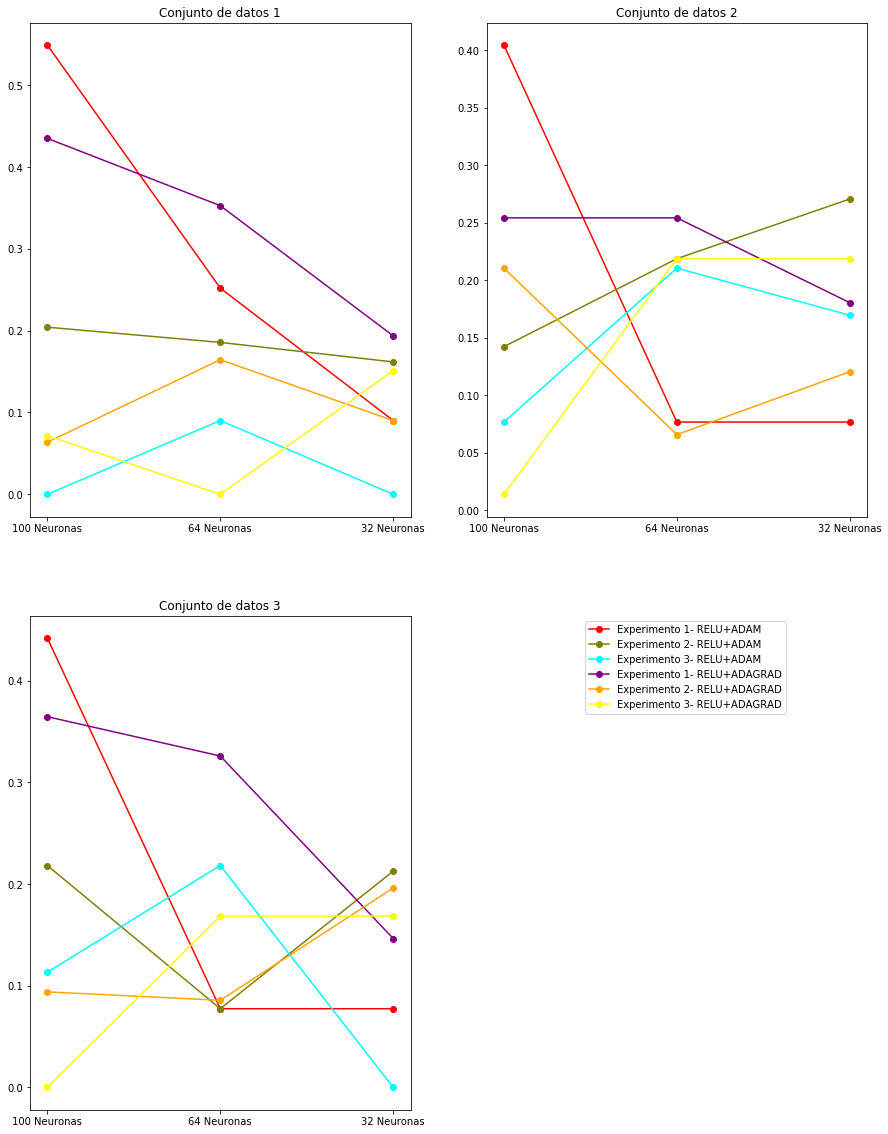

In [6]:
fig = plt.figure(figsize=(15,20))
fig.add_subplot(2,2,1)
plt.plot(df1.loc['Experimento 1- RELU+ADAM'],'o-',label ='Experimento 1- RELU+ADAM',color ='red')
plt.plot(df1.loc['Experimento 2- RELU+ADAM'],'o-',label ='Experimento 2- RELU+ADAM',color ='olive')
plt.plot(df1.loc['Experimento 3- RELU+ADAM'],'o-',label ='Experimento 3- RELU+ADAM',color ='cyan')
plt.plot(df1.loc['Experimento 1- RELU+ADAGRAD'],'o-',label ='Experimento 1- RELU+ADAGRAD',color ='purple')
plt.plot(df1.loc['Experimento 2- RELU+ADAGRAD'],'o-',label ='Experimento 2- RELU+ADAGRAD',color ='orange')
plt.plot(df1.loc['Experimento 3- RELU+ADAGRAD'],'o-',label ='Experimento 3- RELU+ADAGRAD',color ='yellow')
plt.title('Conjunto de datos 1')
fig.add_subplot(2,2,2)
plt.plot(df2.loc['Experimento 1- RELU+ADAM'],'o-',label ='Experimento 1- RELU+ADAM' ,color ='red')
plt.plot(df2.loc['Experimento 2- RELU+ADAM'],'o-',label ='Experimento 2- RELU+ADAM',color ='olive')
plt.plot(df2.loc['Experimento 3- RELU+ADAM'],'o-',label ='Experimento 3- RELU+ADAM',color ='cyan')
plt.plot(df2.loc['Experimento 1- RELU+ADAGRAD'],'o-',label ='Experimento 1- RELU+ADAGRAD',color ='purple')
plt.plot(df2.loc['Experimento 2- RELU+ADAGRAD'],'o-',label ='Experimento 2- RELU+ADAGRAD',color ='orange')
plt.plot(df2.loc['Experimento 3- RELU+ADAGRAD'],'o-',label ='Experimento 3- RELU+ADAGRAD',color ='yellow')
plt.title('Conjunto de datos 2')
fig.add_subplot(2,2,3)
plt.plot(df3.loc['Experimento 1- RELU+ADAM'],'o-',label ='Experimento 1- RELU+ADAM',color ='red')
plt.plot(df3.loc['Experimento 2- RELU+ADAM'],'o-',label ='Experimento 2- RELU+ADAM',color ='olive')
plt.plot(df3.loc['Experimento 3- RELU+ADAM'],'o-',label ='Experimento 3- RELU+ADAM',color ='cyan')
plt.plot(df3.loc['Experimento 1- RELU+ADAGRAD'],'o-',label ='Experimento 1- RELU+ADAGRAD',color ='purple')
plt.plot(df3.loc['Experimento 2- RELU+ADAGRAD'],'o-',label ='Experimento 2- RELU+ADAGRAD',color ='orange')
plt.plot(df3.loc['Experimento 3- RELU+ADAGRAD'],'o-',label ='Experimento 3- RELU+ADAGRAD',color ='yellow')
plt.title('Conjunto de datos 3')
plt.legend(bbox_to_anchor = (2, 1))

In [ ]:
# INTERVALO 1

df1 = pd.DataFrame()
df1['100 Neuronas'] = None
df1['64 Neuronas'] = None
df1['32 Neuronas'] = None
df1.loc['Experimento 1- RELU+ADAM'] = [0.5490716180371353,0.2519893899204244,0.09018567639257294]
df1.loc['Experimento 2- RELU+ADAM'] = [0.20424403183023873,0.1856763925729443,0.16180371352785147]
df1.loc['Experimento 3- RELU+ADAM'] = [0.0,0.09018567639257294,0.0]
df1.loc['Experimento 1- RELU+ADAGRAD'] = [0.4350132625994695,0.35278514588859416,0.19363395225464192]
df1.loc['Experimento 2- RELU+ADAGRAD'] = [0.0636604774535809,0.16445623342175067,0.09018567639257294]
df1.loc['Experimento 3- RELU+ADAGRAD'] = [0.07161803713527852,0.0,0.15119363395225463]
df1

df2 = pd.DataFrame()
df2['100 Neuronas'] = None
df2['64 Neuronas'] = None
df2['32 Neuronas'] = None
df2.loc['Experimento 1- RELU+ADAM'] = [0.40437158469945356,0.07650273224043716,0.07650273224043716]
df2.loc['Experimento 2- RELU+ADAM'] = [0.14207650273224043,0.2185792349726776,0.27049180327868855]
df2.loc['Experimento 3- RELU+ADAM'] = [0.07650273224043716,0.2103825136612022,0.16939890710382513]
df2.loc['Experimento 1- RELU+ADAGRAD'] = [0.2540983606557377,0.2540983606557377,0.18032786885245902]
df2.loc['Experimento 2- RELU+ADAGRAD'] = [0.2103825136612022,0.06557377049180328,0.12021857923497267]
df2.loc['Experimento 3- RELU+ADAGRAD'] = [0.01366120218579235,0.2185792349726776,0.2185792349726776]
df2

df3 = pd.DataFrame()
df3['100 Neuronas'] = None
df3['64 Neuronas'] = None
df3['32 Neuronas'] = None
df3.loc['Experimento 1- RELU+ADAM'] = [0.4419889502762431,0.07734806629834254,0.07734806629834254]
df3.loc['Experimento 2- RELU+ADAM'] = [0.21823204419889503,0.07734806629834254,0.212707182320442]
df3.loc['Experimento 3- RELU+ADAM'] = [0.1132596685082873,0.21823204419889503,0.0]
df3.loc['Experimento 1- RELU+ADAGRAD'] = [0.36464088397790057,0.3259668508287293,0.1464088397790055]
df3.loc['Experimento 2- RELU+ADAGRAD'] = [0.09392265193370165,0.0856353591160221,0.19613259668508287]
df3.loc['Experimento 3- RELU+ADAGRAD'] = [0.0,0.1685082872928177,0.1685082872928177]
df3

fig = plt.figure(figsize=(15,20))
fig.add_subplot(2,2,1)
plt.plot(df1.loc['Experimento 1- RELU+ADAM'],'o-',label ='Experimento 1- RELU+ADAM',color ='red')
plt.plot(df1.loc['Experimento 2- RELU+ADAM'],'o-',label ='Experimento 2- RELU+ADAM',color ='olive')
plt.plot(df1.loc['Experimento 3- RELU+ADAM'],'o-',label ='Experimento 3- RELU+ADAM',color ='cyan')
plt.plot(df1.loc['Experimento 1- RELU+ADAGRAD'],'o-',label ='Experimento 1- RELU+ADAGRAD',color ='purple')
plt.plot(df1.loc['Experimento 2- RELU+ADAGRAD'],'o-',label ='Experimento 2- RELU+ADAGRAD',color ='orange')
plt.plot(df1.loc['Experimento 3- RELU+ADAGRAD'],'o-',label ='Experimento 3- RELU+ADAGRAD',color ='yellow')
plt.title('Conjunto de datos 1')
fig.add_subplot(2,2,2)
plt.plot(df2.loc['Experimento 1- RELU+ADAM'],'o-',label ='Experimento 1- RELU+ADAM' ,color ='red')
plt.plot(df2.loc['Experimento 2- RELU+ADAM'],'o-',label ='Experimento 2- RELU+ADAM',color ='olive')
plt.plot(df2.loc['Experimento 3- RELU+ADAM'],'o-',label ='Experimento 3- RELU+ADAM',color ='cyan')
plt.plot(df2.loc['Experimento 1- RELU+ADAGRAD'],'o-',label ='Experimento 1- RELU+ADAGRAD',color ='purple')
plt.plot(df2.loc['Experimento 2- RELU+ADAGRAD'],'o-',label ='Experimento 2- RELU+ADAGRAD',color ='orange')
plt.plot(df2.loc['Experimento 3- RELU+ADAGRAD'],'o-',label ='Experimento 3- RELU+ADAGRAD',color ='yellow')
plt.title('Conjunto de datos 2')
fig.add_subplot(2,2,3)
plt.plot(df3.loc['Experimento 1- RELU+ADAM'],'o-',label ='Experimento 1- RELU+ADAM',color ='red')
plt.plot(df3.loc['Experimento 2- RELU+ADAM'],'o-',label ='Experimento 2- RELU+ADAM',color ='olive')
plt.plot(df3.loc['Experimento 3- RELU+ADAM'],'o-',label ='Experimento 3- RELU+ADAM',color ='cyan')
plt.plot(df3.loc['Experimento 1- RELU+ADAGRAD'],'o-',label ='Experimento 1- RELU+ADAGRAD',color ='purple')
plt.plot(df3.loc['Experimento 2- RELU+ADAGRAD'],'o-',label ='Experimento 2- RELU+ADAGRAD',color ='orange')
plt.plot(df3.loc['Experimento 3- RELU+ADAGRAD'],'o-',label ='Experimento 3- RELU+ADAGRAD',color ='yellow')
plt.title('Conjunto de datos 3')
plt.legend(bbox_to_anchor = (2, 1))

# Intervalos 2:

Cargamos los datos:

In [121]:
run 10dias-porintervalos2.ipynb

# Conjunto de datos 1

Construimos el modelo:

In [122]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.metrics import confusion_matrix,balanced_accuracy_score,classification_report

In [123]:
def subida(list):
    resultado = []
    for i in range(1,len(list)):
        if  (list)[i] > (list)[i-1]:
            resultado.append(1)
        else:
            resultado.append(0)
    return resultado

def acierto(list1,list2):
    sum = 0
    for i in range(0,len(list1)):
        if(list1[i]==list2[i]):
            sum = sum +1
    a = sum/len(list1)
    return a


### Dense RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

In [124]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 12, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(7, activation='softmax'))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

Modelo 100 neuronas:

In [125]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_360 (Dense)           (None, 100)               1300      
                                                                 
 dense_361 (Dense)           (None, 50)                5050      
                                                                 
 dense_362 (Dense)           (None, 33)                1683      
                                                                 
 dense_363 (Dense)           (None, 25)                850       
                                                                 
 dense_364 (Dense)           (None, 7)                 182       
                                                                 
Total params: 9,065
Trainable params: 9,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [126]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.5782493368700266
Tasa de aciertos balanceada regresión logística: 0.54
Matriz de confusión:
[[54 22  1  0  0]
 [ 8 84  8  0  0]
 [ 0 35 14  7  4]
 [ 0 11 21 44 13]
 [ 0  6  8 15 22]]
              precision    recall  f1-score   support

         1.0       0.87      0.70      0.78        77
         2.0       0.53      0.84      0.65       100
         3.0       0.27      0.23      0.25        60
         4.0       0.67      0.49      0.57        89
         5.0       0.56      0.43      0.49        51

    accuracy                           0.58       377
   macro avg       0.58      0.54      0.55       377
weighted avg       0.60      0.58      0.57       377



Modelo 64 neuronas

In [127]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_365 (Dense)           (None, 64)                832       
                                                                 
 dense_366 (Dense)           (None, 32)                2080      
                                                                 
 dense_367 (Dense)           (None, 21)                693       
                                                                 
 dense_368 (Dense)           (None, 16)                352       
                                                                 
 dense_369 (Dense)           (None, 7)                 119       
                                                                 
Total params: 4,076
Trainable params: 4,076
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

48/48 [==============================] - 0s 2ms/step - loss: 1.5881 - accuracy: 0.3004
Epoch 73/100
48/48 [==============================] - 0s 2ms/step - loss: 1.5874 - accuracy: 0.3004
Epoch 74/100
48/48 [==============================] - 0s 2ms/step - loss: 1.5869 - accuracy: 0.3004
Epoch 75/100
48/48 [==============================] - 0s 2ms/step - loss: 1.5862 - accuracy: 0.3004
Epoch 76/100
48/48 [==============================] - 0s 2ms/step - loss: 1.5857 - accuracy: 0.3004
Epoch 77/100
48/48 [==============================] - 0s 2ms/step - loss: 1.5850 - accuracy: 0.3004
Epoch 78/100
48/48 [==============================] - 0s 2ms/step - loss: 1.5846 - accuracy: 0.3004
Epoch 79/100
48/48 [==============================] - 0s 2ms/step - loss: 1.5841 - accuracy: 0.3004
Epoch 80/100
48/48 [==============================] - 0s 2ms/step - loss: 1.5835 - accuracy: 0.3004
Epoch 81/100
48/48 [==============================] - 0s 2ms/step - loss: 1.5831 - accuracy: 0.3004
Epoch 82/100


In [128]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.13527851458885942
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0   0   0  77]
 [  0   0   0   0 100]
 [  0   0   0   0  60]
 [  0   0   0   0  89]
 [  0   0   0   0  51]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00       100
         3.0       0.00      0.00      0.00        60
         4.0       0.00      0.00      0.00        89
         5.0       0.14      1.00      0.24        51

    accuracy                           0.14       377
   macro avg       0.03      0.20      0.05       377
weighted avg       0.02      0.14      0.03       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [129]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_370 (Dense)           (None, 32)                416       
                                                                 
 dense_371 (Dense)           (None, 16)                528       
                                                                 
 dense_372 (Dense)           (None, 11)                187       
                                                                 
 dense_373 (Dense)           (None, 8)                 96        
                                                                 
 dense_374 (Dense)           (None, 7)                 63        
                                                                 
Total params: 1,290
Trainable params: 1,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [130]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.13527851458885942
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[54 22  1  0  0]
 [ 8 84  8  0  0]
 [ 0 35 14  7  4]
 [ 0 11 21 44 13]
 [ 0  6  8 15 22]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00       100
         3.0       0.00      0.00      0.00        60
         4.0       0.00      0.00      0.00        89
         5.0       0.14      1.00      0.24        51

    accuracy                           0.14       377
   macro avg       0.03      0.20      0.05       377
weighted avg       0.02      0.14      0.03       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [131]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 12, activation=activation_fun))
    model.add(Dense(round(neurons), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

In [132]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_375 (Dense)           (None, 100)               1300      
                                                                 
 dense_376 (Dense)           (None, 100)               10100     
                                                                 
 dense_377 (Dense)           (None, 50)                5050      
                                                                 
 dense_378 (Dense)           (None, 50)                2550      
                                                                 
 dense_379 (Dense)           (None, 7)                 357       
                                                                 
Total params: 19,357
Trainable params: 19,357
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================

In [133]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.2625994694960212
Tasa de aciertos balanceada regresión logística: 0.24
Matriz de confusión:
[[53  0  0 24  0]
 [60  0  0 40  0]
 [26  0  0 34  0]
 [43  0  0 46  0]
 [35  0  0 16  0]]
              precision    recall  f1-score   support

         1.0       0.24      0.69      0.36        77
         2.0       0.00      0.00      0.00       100
         3.0       0.00      0.00      0.00        60
         4.0       0.29      0.52      0.37        89
         5.0       0.00      0.00      0.00        51

    accuracy                           0.26       377
   macro avg       0.11      0.24      0.15       377
weighted avg       0.12      0.26      0.16       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [134]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_380 (Dense)           (None, 64)                832       
                                                                 
 dense_381 (Dense)           (None, 64)                4160      
                                                                 
 dense_382 (Dense)           (None, 32)                2080      
                                                                 
 dense_383 (Dense)           (None, 32)                1056      
                                                                 
 dense_384 (Dense)           (None, 7)                 231       
                                                                 
Total params: 8,359
Trainable params: 8,359
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [135]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.034482758620689655
Tasa de aciertos balanceada regresión logística: 0.03
Matriz de confusión:
[[13  0  0  0  0 64]
 [32  0  0  0  0 68]
 [25  0  0  0  0 35]
 [34  0  0  0  0 55]
 [12  0  0  0  0 39]
 [ 0  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.11      0.17      0.13        77
         2.0       0.00      0.00      0.00       100
         3.0       0.00      0.00      0.00        60
         4.0       0.00      0.00      0.00        89
         5.0       0.00      0.00      0.00        51
         6.0       0.00      0.00      0.00         0

    accuracy                           0.03       377
   macro avg       0.02      0.03      0.02       377
weighted avg       0.02      0.03      0.03       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [136]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_385 (Dense)           (None, 32)                416       
                                                                 
 dense_386 (Dense)           (None, 32)                1056      
                                                                 
 dense_387 (Dense)           (None, 16)                528       
                                                                 
 dense_388 (Dense)           (None, 16)                272       
                                                                 
 dense_389 (Dense)           (None, 7)                 119       
                                                                 
Total params: 2,391
Trainable params: 2,391
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [137]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.11140583554376658
Tasa de aciertos balanceada regresión logística: 0.14
Matriz de confusión:
[[53  0  0 24  0]
 [60  0  0 40  0]
 [26  0  0 34  0]
 [43  0  0 46  0]
 [35  0  0 16  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00       100
         3.0       0.16      0.67      0.25        60
         4.0       0.00      0.00      0.00        89
         5.0       0.17      0.04      0.06        51

    accuracy                           0.11       377
   macro avg       0.05      0.12      0.05       377
weighted avg       0.05      0.11      0.05       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### EXPERIMENTO 3: Modelo 10 capas

In [138]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 12, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(round(neurons/5), activation=activation_fun))
    model.add(Dense(round(neurons/6), activation=activation_fun))
    model.add(Dense(round(neurons/7), activation=activation_fun))
    model.add(Dense(round(neurons/8), activation=activation_fun))
    model.add(Dense(round(neurons/9), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model


Modelo 100 neuronas:

In [139]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_390 (Dense)           (None, 100)               1300      
                                                                 
 dense_391 (Dense)           (None, 50)                5050      
                                                                 
 dense_392 (Dense)           (None, 33)                1683      
                                                                 
 dense_393 (Dense)           (None, 25)                850       
                                                                 
 dense_394 (Dense)           (None, 20)                520       
                                                                 
 dense_395 (Dense)           (None, 17)                357       
                                                                 
 dense_396 (Dense)           (None, 14)              

Epoch 65/100
48/48 [==============================] - 0s 3ms/step - loss: 12.9298 - accuracy: 0.1207
Epoch 66/100
48/48 [==============================] - 0s 3ms/step - loss: 12.9298 - accuracy: 0.1207
Epoch 67/100
48/48 [==============================] - 0s 3ms/step - loss: 12.9298 - accuracy: 0.1207
Epoch 68/100
48/48 [==============================] - 0s 3ms/step - loss: 12.9298 - accuracy: 0.1207
Epoch 69/100
48/48 [==============================] - 0s 3ms/step - loss: 12.9298 - accuracy: 0.1207
Epoch 70/100
48/48 [==============================] - 0s 3ms/step - loss: 12.9298 - accuracy: 0.1207
Epoch 71/100
48/48 [==============================] - 0s 3ms/step - loss: 12.9298 - accuracy: 0.1207
Epoch 72/100
48/48 [==============================] - 0s 3ms/step - loss: 12.9298 - accuracy: 0.1207
Epoch 73/100
48/48 [==============================] - 0s 3ms/step - loss: 12.9298 - accuracy: 0.1207
Epoch 74/100
48/48 [==============================] - 0s 3ms/step - loss: 12.9298 - accurac

In [140]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.15915119363395225
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0  77   0   0]
 [  0   0 100   0   0]
 [  0   0  60   0   0]
 [  0   0  89   0   0]
 [  0   0  51   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00       100
         3.0       0.16      1.00      0.27        60
         4.0       0.00      0.00      0.00        89
         5.0       0.00      0.00      0.00        51

    accuracy                           0.16       377
   macro avg       0.03      0.20      0.05       377
weighted avg       0.03      0.16      0.04       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas:

In [141]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_400 (Dense)           (None, 64)                832       
                                                                 
 dense_401 (Dense)           (None, 32)                2080      
                                                                 
 dense_402 (Dense)           (None, 21)                693       
                                                                 
 dense_403 (Dense)           (None, 16)                352       
                                                                 
 dense_404 (Dense)           (None, 13)                221       
                                                                 
 dense_405 (Dense)           (None, 11)                154       
                                                                 
 dense_406 (Dense)           (None, 9)               

In [142]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.1962864721485411
Tasa de aciertos balanceada regresión logística: 0.23
Matriz de confusión:
[[ 0  0  0 20 57]
 [ 0  0  0 31 69]
 [ 0  0  0 22 38]
 [ 0  0  0 38 51]
 [ 0  0  0 15 36]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00       100
         3.0       0.00      0.00      0.00        60
         4.0       0.30      0.43      0.35        89
         5.0       0.14      0.71      0.24        51

    accuracy                           0.20       377
   macro avg       0.09      0.23      0.12       377
weighted avg       0.09      0.20      0.12       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [143]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_410 (Dense)           (None, 32)                416       
                                                                 
 dense_411 (Dense)           (None, 16)                528       
                                                                 
 dense_412 (Dense)           (None, 11)                187       
                                                                 
 dense_413 (Dense)           (None, 8)                 96        
                                                                 
 dense_414 (Dense)           (None, 6)                 54        
                                                                 
 dense_415 (Dense)           (None, 5)                 35        
                                                                 
 dense_416 (Dense)           (None, 5)               

In [144]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.07957559681697612
Tasa de aciertos balanceada regresión logística: 0.07
Matriz de confusión:
[[  0   0  77   0   0]
 [  0   0 100   0   0]
 [  0   0  60   0   0]
 [  0   0  89   0   0]
 [  0   0  51   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00       100
         3.0       0.00      0.00      0.00        60
         4.0       0.25      0.34      0.29        89
         5.0       0.00      0.00      0.00        51

    accuracy                           0.08       377
   macro avg       0.04      0.06      0.05       377
weighted avg       0.06      0.08      0.07       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### Dense RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [145]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_420 (Dense)           (None, 100)               1300      
                                                                 
 dense_421 (Dense)           (None, 50)                5050      
                                                                 
 dense_422 (Dense)           (None, 33)                1683      
                                                                 
 dense_423 (Dense)           (None, 25)                850       
                                                                 
 dense_424 (Dense)           (None, 7)                 182       
                                                                 
Total params: 9,065
Trainable params: 9,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [146]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.47480106100795755
Tasa de aciertos balanceada regresión logística: 0.48
Matriz de confusión:
[[61 13  3  0  0]
 [29 50 16  1  4]
 [12 20 21  5  2]
 [ 6 14 18 18 33]
 [ 3  7  4  8 29]]
              precision    recall  f1-score   support

         1.0       0.55      0.79      0.65        77
         2.0       0.48      0.50      0.49       100
         3.0       0.34      0.35      0.34        60
         4.0       0.56      0.20      0.30        89
         5.0       0.43      0.57      0.49        51

    accuracy                           0.47       377
   macro avg       0.47      0.48      0.45       377
weighted avg       0.48      0.47      0.45       377



Modelo 64 neuronas

In [147]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_425 (Dense)           (None, 64)                832       
                                                                 
 dense_426 (Dense)           (None, 32)                2080      
                                                                 
 dense_427 (Dense)           (None, 21)                693       
                                                                 
 dense_428 (Dense)           (None, 16)                352       
                                                                 
 dense_429 (Dense)           (None, 7)                 119       
                                                                 
Total params: 4,076
Trainable params: 4,076
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [148]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.3819628647214854
Tasa de aciertos balanceada regresión logística: 0.39
Matriz de confusión:
[[51 14  1  9  1  1]
 [30 34  7 21  7  1]
 [ 8 14 10 16 12  0]
 [ 1 23 16 22 27  0]
 [ 0  8  6 10 27  0]
 [ 0  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.57      0.66      0.61        77
         2.0       0.37      0.34      0.35       100
         3.0       0.25      0.17      0.20        60
         4.0       0.28      0.25      0.26        89
         5.0       0.36      0.53      0.43        51
         6.0       0.00      0.00      0.00         0

    accuracy                           0.38       377
   macro avg       0.30      0.32      0.31       377
weighted avg       0.37      0.38      0.37       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Us

Modelo 32 neuronas:

In [149]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_430 (Dense)           (None, 32)                416       
                                                                 
 dense_431 (Dense)           (None, 16)                528       
                                                                 
 dense_432 (Dense)           (None, 11)                187       
                                                                 
 dense_433 (Dense)           (None, 8)                 96        
                                                                 
 dense_434 (Dense)           (None, 7)                 63        
                                                                 
Total params: 1,290
Trainable params: 1,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

48/48 [==============================] - 0s 2ms/step - loss: 2.0988 - accuracy: 0.3004
Epoch 73/100
48/48 [==============================] - 0s 2ms/step - loss: 2.0958 - accuracy: 0.2997
Epoch 74/100
48/48 [==============================] - 0s 2ms/step - loss: 2.0930 - accuracy: 0.3004
Epoch 75/100
48/48 [==============================] - 0s 2ms/step - loss: 2.0901 - accuracy: 0.2997
Epoch 76/100
48/48 [==============================] - 0s 2ms/step - loss: 2.0876 - accuracy: 0.3004
Epoch 77/100
48/48 [==============================] - 0s 2ms/step - loss: 2.0845 - accuracy: 0.3004
Epoch 78/100
48/48 [==============================] - 0s 2ms/step - loss: 2.0816 - accuracy: 0.2997
Epoch 79/100
48/48 [==============================] - 0s 2ms/step - loss: 2.0794 - accuracy: 0.3004
Epoch 80/100
48/48 [==============================] - 0s 2ms/step - loss: 2.0764 - accuracy: 0.3004
Epoch 81/100
48/48 [==============================] - 0s 3ms/step - loss: 2.0736 - accuracy: 0.3004
Epoch 82/100


In [150]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.13527851458885942
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[61 13  3  0  0]
 [29 50 16  1  4]
 [12 20 21  5  2]
 [ 6 14 18 18 33]
 [ 3  7  4  8 29]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00       100
         3.0       0.00      0.00      0.00        60
         4.0       0.00      0.00      0.00        89
         5.0       0.14      1.00      0.24        51

    accuracy                           0.14       377
   macro avg       0.03      0.20      0.05       377
weighted avg       0.02      0.14      0.03       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [151]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_435 (Dense)           (None, 100)               1300      
                                                                 
 dense_436 (Dense)           (None, 100)               10100     
                                                                 
 dense_437 (Dense)           (None, 50)                5050      
                                                                 
 dense_438 (Dense)           (None, 50)                2550      
                                                                 
 dense_439 (Dense)           (None, 7)                 357       
                                                                 
Total params: 19,357
Trainable params: 19,357
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================

In [152]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.15915119363395225
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0  77   0   0]
 [  0   0 100   0   0]
 [  0   0  60   0   0]
 [  0   0  89   0   0]
 [  0   0  51   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00       100
         3.0       0.16      1.00      0.27        60
         4.0       0.00      0.00      0.00        89
         5.0       0.00      0.00      0.00        51

    accuracy                           0.16       377
   macro avg       0.03      0.20      0.05       377
weighted avg       0.03      0.16      0.04       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [153]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_440 (Dense)           (None, 64)                832       
                                                                 
 dense_441 (Dense)           (None, 64)                4160      
                                                                 
 dense_442 (Dense)           (None, 32)                2080      
                                                                 
 dense_443 (Dense)           (None, 32)                1056      
                                                                 
 dense_444 (Dense)           (None, 7)                 231       
                                                                 
Total params: 8,359
Trainable params: 8,359
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [154]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.1220159151193634
Tasa de aciertos balanceada regresión logística: 0.15
Matriz de confusión:
[[ 0  0  0  0  0  0]
 [12 23  0  0  0 42]
 [16 41  0  0  0 43]
 [ 4 35  0  0  0 21]
 [12 47  0  0  0 30]
 [11 17  0  0  0 23]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.14      0.30      0.19        77
         2.0       0.00      0.00      0.00       100
         3.0       0.00      0.00      0.00        60
         4.0       0.00      0.00      0.00        89
         5.0       0.14      0.45      0.22        51

    accuracy                           0.12       377
   macro avg       0.05      0.12      0.07       377
weighted avg       0.05      0.12      0.07       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [155]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_445 (Dense)           (None, 32)                416       
                                                                 
 dense_446 (Dense)           (None, 32)                1056      
                                                                 
 dense_447 (Dense)           (None, 16)                528       
                                                                 
 dense_448 (Dense)           (None, 16)                272       
                                                                 
 dense_449 (Dense)           (None, 7)                 119       
                                                                 
Total params: 2,391
Trainable params: 2,391
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [156]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.07957559681697612
Tasa de aciertos balanceada regresión logística: 0.10
Matriz de confusión:
[[  0   0  77   0   0]
 [  0   0 100   0   0]
 [  0   0  60   0   0]
 [  0   0  89   0   0]
 [  0   0  51   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00       100
         3.0       0.12      0.50      0.20        60
         4.0       0.00      0.00      0.00        89
         5.0       0.00      0.00      0.00        51
         6.0       0.00      0.00      0.00         0

    accuracy                           0.08       377
   macro avg       0.02      0.08      0.03       377
weighted avg       0.02      0.08      0.03       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [157]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_450 (Dense)           (None, 100)               1300      
                                                                 
 dense_451 (Dense)           (None, 50)                5050      
                                                                 
 dense_452 (Dense)           (None, 33)                1683      
                                                                 
 dense_453 (Dense)           (None, 25)                850       
                                                                 
 dense_454 (Dense)           (None, 20)                520       
                                                                 
 dense_455 (Dense)           (None, 17)                357       
                                                                 
 dense_456 (Dense)           (None, 14)              

In [158]:
y_preddense100 = modeldense100.predict(testX1)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.20424403183023873
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[ 77   0   0   0   0]
 [100   0   0   0   0]
 [ 60   0   0   0   0]
 [ 89   0   0   0   0]
 [ 51   0   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.20      1.00      0.34        77
         2.0       0.00      0.00      0.00       100
         3.0       0.00      0.00      0.00        60
         4.0       0.00      0.00      0.00        89
         5.0       0.00      0.00      0.00        51

    accuracy                           0.20       377
   macro avg       0.04      0.20      0.07       377
weighted avg       0.04      0.20      0.07       377



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas:

In [159]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_460 (Dense)           (None, 64)                832       
                                                                 
 dense_461 (Dense)           (None, 32)                2080      
                                                                 
 dense_462 (Dense)           (None, 21)                693       
                                                                 
 dense_463 (Dense)           (None, 16)                352       
                                                                 
 dense_464 (Dense)           (None, 13)                221       
                                                                 
 dense_465 (Dense)           (None, 11)                154       
                                                                 
 dense_466 (Dense)           (None, 9)               

48/48 [==============================] - 0s 2ms/step - loss: 6.4740 - accuracy: 0.0000e+00
Epoch 64/100
48/48 [==============================] - 0s 2ms/step - loss: 6.4740 - accuracy: 0.0000e+00
Epoch 65/100
48/48 [==============================] - 0s 2ms/step - loss: 6.4740 - accuracy: 0.0000e+00
Epoch 66/100
48/48 [==============================] - 0s 2ms/step - loss: 6.4740 - accuracy: 0.0000e+00
Epoch 67/100
48/48 [==============================] - 0s 2ms/step - loss: 6.4740 - accuracy: 0.0000e+00
Epoch 68/100
48/48 [==============================] - 0s 2ms/step - loss: 6.4740 - accuracy: 0.0000e+00
Epoch 69/100
48/48 [==============================] - 0s 2ms/step - loss: 6.4740 - accuracy: 0.0000e+00
Epoch 70/100
48/48 [==============================] - 0s 2ms/step - loss: 6.4740 - accuracy: 0.0000e+00
Epoch 71/100
48/48 [==============================] - 0s 2ms/step - loss: 6.4740 - accuracy: 0.0000e+00
Epoch 72/100
48/48 [==============================] - 0s 2ms/step - loss: 6.4

In [160]:
y_preddense64 = modeldense64.predict(testX1)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[  0   0   0   0   0  77]
 [  0   0   0   0   0 100]
 [  0   0   0   0   0  60]
 [  0   0   0   0   0  89]
 [  0   0   0   0   0  51]
 [  0   0   0   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      77.0
         2.0       0.00      0.00      0.00     100.0
         3.0       0.00      0.00      0.00      60.0
         4.0       0.00      0.00      0.00      89.0
         5.0       0.00      0.00      0.00      51.0
         6.0       0.00      0.00      0.00       0.0

    accuracy                           0.00     377.0
   macro avg       0.00      0.00      0.00     377.0
weighted avg       0.00      0.00      0.00     377.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [161]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_470 (Dense)           (None, 32)                416       
                                                                 
 dense_471 (Dense)           (None, 16)                528       
                                                                 
 dense_472 (Dense)           (None, 11)                187       
                                                                 
 dense_473 (Dense)           (None, 8)                 96        
                                                                 
 dense_474 (Dense)           (None, 6)                 54        
                                                                 
 dense_475 (Dense)           (None, 5)                 35        
                                                                 
 dense_476 (Dense)           (None, 5)               

48/48 [==============================] - 0s 2ms/step - loss: 1.9459 - accuracy: 0.0000e+00
Epoch 64/100
48/48 [==============================] - 0s 2ms/step - loss: 1.9459 - accuracy: 0.0000e+00
Epoch 65/100
48/48 [==============================] - 0s 2ms/step - loss: 1.9459 - accuracy: 0.0000e+00
Epoch 66/100
48/48 [==============================] - 0s 2ms/step - loss: 1.9459 - accuracy: 0.0000e+00
Epoch 67/100
48/48 [==============================] - 0s 2ms/step - loss: 1.9459 - accuracy: 0.0000e+00
Epoch 68/100
48/48 [==============================] - 0s 2ms/step - loss: 1.9459 - accuracy: 0.0000e+00
Epoch 69/100
48/48 [==============================] - 0s 2ms/step - loss: 1.9459 - accuracy: 0.0000e+00
Epoch 70/100
48/48 [==============================] - 0s 2ms/step - loss: 1.9459 - accuracy: 0.0000e+00
Epoch 71/100
48/48 [==============================] - 0s 2ms/step - loss: 1.9459 - accuracy: 0.0000e+00
Epoch 72/100
48/48 [==============================] - 0s 3ms/step - loss: 1.9

In [162]:
y_preddense32 = modeldense32.predict(testX1)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[ 77   0   0   0   0]
 [100   0   0   0   0]
 [ 60   0   0   0   0]
 [ 89   0   0   0   0]
 [ 51   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      77.0
         2.0       0.00      0.00      0.00     100.0
         3.0       0.00      0.00      0.00      60.0
         4.0       0.00      0.00      0.00      89.0
         5.0       0.00      0.00      0.00      51.0

    accuracy                           0.00     377.0
   macro avg       0.00      0.00      0.00     377.0
weighted avg       0.00      0.00      0.00     377.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

# Conjunto de datos 2

Construimos el modelo:

### Dense RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

In [163]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 22, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(7, activation='softmax'))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

Modelo 100 neuronas:

In [164]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_480 (Dense)           (None, 100)               2300      
                                                                 
 dense_481 (Dense)           (None, 50)                5050      
                                                                 
 dense_482 (Dense)           (None, 33)                1683      
                                                                 
 dense_483 (Dense)           (None, 25)                850       
                                                                 
 dense_484 (Dense)           (None, 7)                 182       
                                                                 
Total params: 10,065
Trainable params: 10,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [165]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.4098360655737705
Tasa de aciertos balanceada regresión logística: 0.44
Matriz de confusión:
[[62  9  0  6  0]
 [21 33  3 31 12]
 [ 0  7  1 15 37]
 [ 0  4  0 17 63]
 [ 1  1  0  6 37]]
              precision    recall  f1-score   support

         1.0       0.74      0.81      0.77        77
         2.0       0.61      0.33      0.43       100
         3.0       0.25      0.02      0.03        60
         4.0       0.23      0.20      0.21        84
         5.0       0.25      0.82      0.38        45

    accuracy                           0.41       366
   macro avg       0.41      0.44      0.37       366
weighted avg       0.45      0.41      0.38       366



Modelo 64 neuronas

In [166]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_485 (Dense)           (None, 64)                1472      
                                                                 
 dense_486 (Dense)           (None, 32)                2080      
                                                                 
 dense_487 (Dense)           (None, 21)                693       
                                                                 
 dense_488 (Dense)           (None, 16)                352       
                                                                 
 dense_489 (Dense)           (None, 7)                 119       
                                                                 
Total params: 4,716
Trainable params: 4,716
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [167]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.3442622950819672
Tasa de aciertos balanceada regresión logística: 0.40
Matriz de confusión:
[[73  2  0  0  2]
 [76  5  6  0 13]
 [14  7 13  0 26]
 [ 8  5  8  0 63]
 [ 5  1  4  0 35]]
              precision    recall  f1-score   support

         1.0       0.41      0.95      0.58        77
         2.0       0.25      0.05      0.08       100
         3.0       0.42      0.22      0.29        60
         4.0       0.00      0.00      0.00        84
         5.0       0.25      0.78      0.38        45

    accuracy                           0.34       366
   macro avg       0.27      0.40      0.27       366
weighted avg       0.26      0.34      0.24       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [168]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_490 (Dense)           (None, 32)                736       
                                                                 
 dense_491 (Dense)           (None, 16)                528       
                                                                 
 dense_492 (Dense)           (None, 11)                187       
                                                                 
 dense_493 (Dense)           (None, 8)                 96        
                                                                 
 dense_494 (Dense)           (None, 7)                 63        
                                                                 
Total params: 1,610
Trainable params: 1,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [169]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.12295081967213115
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[62  9  0  6  0]
 [21 33  3 31 12]
 [ 0  7  1 15 37]
 [ 0  4  0 17 63]
 [ 1  1  0  6 37]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00       100
         3.0       0.00      0.00      0.00        60
         4.0       0.00      0.00      0.00        84
         5.0       0.12      1.00      0.22        45

    accuracy                           0.12       366
   macro avg       0.02      0.20      0.04       366
weighted avg       0.02      0.12      0.03       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [170]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 22, activation=activation_fun))
    model.add(Dense(round(neurons), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

In [171]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_495 (Dense)           (None, 100)               2300      
                                                                 
 dense_496 (Dense)           (None, 100)               10100     
                                                                 
 dense_497 (Dense)           (None, 50)                5050      
                                                                 
 dense_498 (Dense)           (None, 50)                2550      
                                                                 
 dense_499 (Dense)           (None, 7)                 357       
                                                                 
Total params: 20,357
Trainable params: 20,357
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [172]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.12295081967213115
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0   0   0  77]
 [  0   0   0   0 100]
 [  0   0   0   0  60]
 [  0   0   0   0  84]
 [  0   0   0   0  45]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00       100
         3.0       0.00      0.00      0.00        60
         4.0       0.00      0.00      0.00        84
         5.0       0.12      1.00      0.22        45

    accuracy                           0.12       366
   macro avg       0.02      0.20      0.04       366
weighted avg       0.02      0.12      0.03       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [173]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_500 (Dense)           (None, 64)                1472      
                                                                 
 dense_501 (Dense)           (None, 64)                4160      
                                                                 
 dense_502 (Dense)           (None, 32)                2080      
                                                                 
 dense_503 (Dense)           (None, 32)                1056      
                                                                 
 dense_504 (Dense)           (None, 7)                 231       
                                                                 
Total params: 8,999
Trainable params: 8,999
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [174]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.06830601092896176
Tasa de aciertos balanceada regresión logística: 0.08
Matriz de confusión:
[[ 0  0 53  0  0 24]
 [ 0  0 58  0  0 42]
 [ 0  0 25  0  0 35]
 [ 0  0 36  0  0 48]
 [ 0  0 27  0  0 18]
 [ 0  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00       100
         3.0       0.13      0.42      0.19        60
         4.0       0.00      0.00      0.00        84
         5.0       0.00      0.00      0.00        45
         6.0       0.00      0.00      0.00         0

    accuracy                           0.07       366
   macro avg       0.02      0.07      0.03       366
weighted avg       0.02      0.07      0.03       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [175]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_505 (Dense)           (None, 32)                736       
                                                                 
 dense_506 (Dense)           (None, 32)                1056      
                                                                 
 dense_507 (Dense)           (None, 16)                528       
                                                                 
 dense_508 (Dense)           (None, 16)                272       
                                                                 
 dense_509 (Dense)           (None, 7)                 119       
                                                                 
Total params: 2,711
Trainable params: 2,711
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [176]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[  0   0   0   0  77]
 [  0   0   0   0 100]
 [  0   0   0   0  60]
 [  0   0   0   0  84]
 [  0   0   0   0  45]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      77.0
         2.0       0.00      0.00      0.00     100.0
         3.0       0.00      0.00      0.00      60.0
         4.0       0.00      0.00      0.00      84.0
         5.0       0.00      0.00      0.00      45.0
         6.0       0.00      0.00      0.00       0.0

    accuracy                           0.00     366.0
   macro avg       0.00      0.00      0.00     366.0
weighted avg       0.00      0.00      0.00     366.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### EXPERIMENTO 3: Modelo 10 capas

In [177]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 22, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(round(neurons/5), activation=activation_fun))
    model.add(Dense(round(neurons/6), activation=activation_fun))
    model.add(Dense(round(neurons/7), activation=activation_fun))
    model.add(Dense(round(neurons/8), activation=activation_fun))
    model.add(Dense(round(neurons/9), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model


Modelo 100 neuronas:

In [178]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_510 (Dense)           (None, 100)               2300      
                                                                 
 dense_511 (Dense)           (None, 50)                5050      
                                                                 
 dense_512 (Dense)           (None, 33)                1683      
                                                                 
 dense_513 (Dense)           (None, 25)                850       
                                                                 
 dense_514 (Dense)           (None, 20)                520       
                                                                 
 dense_515 (Dense)           (None, 17)                357       
                                                                 
 dense_516 (Dense)           (None, 14)              

In [179]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.01092896174863388
Tasa de aciertos balanceada regresión logística: 0.01
Matriz de confusión:
[[ 4  0  0  0  0 73]
 [ 9  0  0  0  0 91]
 [ 9  0  0  0  0 51]
 [11  0  0  0  0 73]
 [ 3  0  0  0  0 42]
 [ 0  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.11      0.05      0.07        77
         2.0       0.00      0.00      0.00       100
         3.0       0.00      0.00      0.00        60
         4.0       0.00      0.00      0.00        84
         5.0       0.00      0.00      0.00        45
         6.0       0.00      0.00      0.00         0

    accuracy                           0.01       366
   macro avg       0.02      0.01      0.01       366
weighted avg       0.02      0.01      0.01       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas:

In [180]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_520 (Dense)           (None, 64)                1472      
                                                                 
 dense_521 (Dense)           (None, 32)                2080      
                                                                 
 dense_522 (Dense)           (None, 21)                693       
                                                                 
 dense_523 (Dense)           (None, 16)                352       
                                                                 
 dense_524 (Dense)           (None, 13)                221       
                                                                 
 dense_525 (Dense)           (None, 11)                154       
                                                                 
 dense_526 (Dense)           (None, 9)               

In [181]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.25956284153005466
Tasa de aciertos balanceada regresión logística: 0.19
Matriz de confusión:
[[ 0 75  0  0  2]
 [ 0 93  0  0  7]
 [ 0 53  0  0  7]
 [ 0 78  0  0  6]
 [ 0 43  0  0  2]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.27      0.93      0.42       100
         3.0       0.00      0.00      0.00        60
         4.0       0.00      0.00      0.00        84
         5.0       0.08      0.04      0.06        45

    accuracy                           0.26       366
   macro avg       0.07      0.19      0.10       366
weighted avg       0.08      0.26      0.12       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [182]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_530 (Dense)           (None, 32)                736       
                                                                 
 dense_531 (Dense)           (None, 16)                528       
                                                                 
 dense_532 (Dense)           (None, 11)                187       
                                                                 
 dense_533 (Dense)           (None, 8)                 96        
                                                                 
 dense_534 (Dense)           (None, 6)                 54        
                                                                 
 dense_535 (Dense)           (None, 5)                 35        
                                                                 
 dense_536 (Dense)           (None, 5)               

Epoch 65/100
46/46 [==============================] - 0s 3ms/step - loss: 14.2020 - accuracy: 0.1619
Epoch 66/100
46/46 [==============================] - 0s 3ms/step - loss: 14.2020 - accuracy: 0.1619
Epoch 67/100
46/46 [==============================] - 0s 3ms/step - loss: 14.2020 - accuracy: 0.1619
Epoch 68/100
46/46 [==============================] - 0s 3ms/step - loss: 14.2020 - accuracy: 0.1619
Epoch 69/100
46/46 [==============================] - 0s 3ms/step - loss: 14.2020 - accuracy: 0.1619
Epoch 70/100
46/46 [==============================] - 0s 3ms/step - loss: 14.2020 - accuracy: 0.1619
Epoch 71/100
46/46 [==============================] - 0s 3ms/step - loss: 14.2020 - accuracy: 0.1619
Epoch 72/100
46/46 [==============================] - 0s 3ms/step - loss: 14.2020 - accuracy: 0.1619
Epoch 73/100
46/46 [==============================] - 0s 3ms/step - loss: 14.2020 - accuracy: 0.1619
Epoch 74/100
46/46 [==============================] - 0s 3ms/step - loss: 14.2020 - accurac

In [183]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.2103825136612022
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[ 4  0  0  0  0 73]
 [ 9  0  0  0  0 91]
 [ 9  0  0  0  0 51]
 [11  0  0  0  0 73]
 [ 3  0  0  0  0 42]
 [ 0  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.21      1.00      0.35        77
         2.0       0.00      0.00      0.00       100
         3.0       0.00      0.00      0.00        60
         4.0       0.00      0.00      0.00        84
         5.0       0.00      0.00      0.00        45

    accuracy                           0.21       366
   macro avg       0.04      0.20      0.07       366
weighted avg       0.04      0.21      0.07       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Dense RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [184]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_540 (Dense)           (None, 100)               2300      
                                                                 
 dense_541 (Dense)           (None, 50)                5050      
                                                                 
 dense_542 (Dense)           (None, 33)                1683      
                                                                 
 dense_543 (Dense)           (None, 25)                850       
                                                                 
 dense_544 (Dense)           (None, 7)                 182       
                                                                 
Total params: 10,065
Trainable params: 10,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [185]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.3825136612021858
Tasa de aciertos balanceada regresión logística: 0.36
Matriz de confusión:
[[42 30  1  2  2]
 [21 53  2 19  5]
 [ 6 32  1 12  9]
 [ 2 29  9 24 20]
 [ 2 10  2 11 20]]
              precision    recall  f1-score   support

         1.0       0.58      0.55      0.56        77
         2.0       0.34      0.53      0.42       100
         3.0       0.07      0.02      0.03        60
         4.0       0.35      0.29      0.32        84
         5.0       0.36      0.44      0.40        45

    accuracy                           0.38       366
   macro avg       0.34      0.36      0.34       366
weighted avg       0.35      0.38      0.36       366



Modelo 64 neuronas

In [186]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_545 (Dense)           (None, 64)                1472      
                                                                 
 dense_546 (Dense)           (None, 32)                2080      
                                                                 
 dense_547 (Dense)           (None, 21)                693       
                                                                 
 dense_548 (Dense)           (None, 16)                352       
                                                                 
 dense_549 (Dense)           (None, 7)                 119       
                                                                 
Total params: 4,716
Trainable params: 4,716
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [187]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.22950819672131148
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[  0   0   0  77   0]
 [  0   0   0 100   0]
 [  0   1   0  59   0]
 [  0   0   0  84   0]
 [  0   0   0  45   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00       100
         3.0       0.00      0.00      0.00        60
         4.0       0.23      1.00      0.37        84
         5.0       0.00      0.00      0.00        45

    accuracy                           0.23       366
   macro avg       0.05      0.20      0.07       366
weighted avg       0.05      0.23      0.09       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [188]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_550 (Dense)           (None, 32)                736       
                                                                 
 dense_551 (Dense)           (None, 16)                528       
                                                                 
 dense_552 (Dense)           (None, 11)                187       
                                                                 
 dense_553 (Dense)           (None, 8)                 96        
                                                                 
 dense_554 (Dense)           (None, 7)                 63        
                                                                 
Total params: 1,610
Trainable params: 1,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [189]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.2103825136612022
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[42 30  1  2  2]
 [21 53  2 19  5]
 [ 6 32  1 12  9]
 [ 2 29  9 24 20]
 [ 2 10  2 11 20]]
              precision    recall  f1-score   support

         1.0       0.21      1.00      0.35        77
         2.0       0.00      0.00      0.00       100
         3.0       0.00      0.00      0.00        60
         4.0       0.00      0.00      0.00        84
         5.0       0.00      0.00      0.00        45

    accuracy                           0.21       366
   macro avg       0.04      0.20      0.07       366
weighted avg       0.04      0.21      0.07       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [190]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_555 (Dense)           (None, 100)               2300      
                                                                 
 dense_556 (Dense)           (None, 100)               10100     
                                                                 
 dense_557 (Dense)           (None, 50)                5050      
                                                                 
 dense_558 (Dense)           (None, 50)                2550      
                                                                 
 dense_559 (Dense)           (None, 7)                 357       
                                                                 
Total params: 20,357
Trainable params: 20,357
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [191]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [62  0  0  0  0  0 15]
 [65  0  0  0  0  0 35]
 [30  0  0  0  0  0 30]
 [44  0  0  0  0  0 40]
 [32  0  0  0  0  0 13]
 [ 0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      77.0
         2.0       0.00      0.00      0.00     100.0
         3.0       0.00      0.00      0.00      60.0
         4.0       0.00      0.00      0.00      84.0
         5.0       0.00      0.00      0.00      45.0
         6.0       0.00      0.00      0.00       0.0

    accuracy                           0.00     366.0
   macro avg       0.00      0.00      0.00     366.0
weighted avg       0.00      0.00      0.00     366.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas

In [192]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_560 (Dense)           (None, 64)                1472      
                                                                 
 dense_561 (Dense)           (None, 64)                4160      
                                                                 
 dense_562 (Dense)           (None, 32)                2080      
                                                                 
 dense_563 (Dense)           (None, 32)                1056      
                                                                 
 dense_564 (Dense)           (None, 7)                 231       
                                                                 
Total params: 8,999
Trainable params: 8,999
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [193]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.12021857923497267
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[ 0  0 47  0 30]
 [ 0  0 44  0 56]
 [ 0  0 22  0 38]
 [ 0  0 22  0 62]
 [ 0  0 23  0 22]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00       100
         3.0       0.14      0.37      0.20        60
         4.0       0.00      0.00      0.00        84
         5.0       0.11      0.49      0.17        45

    accuracy                           0.12       366
   macro avg       0.05      0.17      0.08       366
weighted avg       0.04      0.12      0.05       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [194]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_565 (Dense)           (None, 32)                736       
                                                                 
 dense_566 (Dense)           (None, 32)                1056      
                                                                 
 dense_567 (Dense)           (None, 16)                528       
                                                                 
 dense_568 (Dense)           (None, 16)                272       
                                                                 
 dense_569 (Dense)           (None, 7)                 119       
                                                                 
Total params: 2,711
Trainable params: 2,711
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [195]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.2978142076502732
Tasa de aciertos balanceada regresión logística: 0.23
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [62  0  0  0  0  0 15]
 [65  0  0  0  0  0 35]
 [30  0  0  0  0  0 30]
 [44  0  0  0  0  0 40]
 [32  0  0  0  0  0 13]
 [ 0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.32      0.32      0.32        77
         2.0       0.29      0.84      0.43       100
         3.0       0.00      0.00      0.00        60
         4.0       0.00      0.00      0.00        84
         5.0       0.00      0.00      0.00        45

    accuracy                           0.30       366
   macro avg       0.12      0.23      0.15       366
weighted avg       0.15      0.30      0.19       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [196]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_570 (Dense)           (None, 100)               2300      
                                                                 
 dense_571 (Dense)           (None, 50)                5050      
                                                                 
 dense_572 (Dense)           (None, 33)                1683      
                                                                 
 dense_573 (Dense)           (None, 25)                850       
                                                                 
 dense_574 (Dense)           (None, 20)                520       
                                                                 
 dense_575 (Dense)           (None, 17)                357       
                                                                 
 dense_576 (Dense)           (None, 14)              

In [197]:
y_preddense100 = modeldense100.predict(testX2)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.16120218579234974
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[ 0  0 77  0  0  0]
 [ 0  0 98  0  0  2]
 [ 0  0 59  0  0  1]
 [ 0  0 80  0  0  4]
 [ 0  0 45  0  0  0]
 [ 0  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00       100
         3.0       0.16      0.98      0.28        60
         4.0       0.00      0.00      0.00        84
         5.0       0.00      0.00      0.00        45
         6.0       0.00      0.00      0.00         0

    accuracy                           0.16       366
   macro avg       0.03      0.16      0.05       366
weighted avg       0.03      0.16      0.05       366



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas:

In [198]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_580 (Dense)           (None, 64)                1472      
                                                                 
 dense_581 (Dense)           (None, 32)                2080      
                                                                 
 dense_582 (Dense)           (None, 21)                693       
                                                                 
 dense_583 (Dense)           (None, 16)                352       
                                                                 
 dense_584 (Dense)           (None, 13)                221       
                                                                 
 dense_585 (Dense)           (None, 11)                154       
                                                                 
 dense_586 (Dense)           (None, 9)               

In [199]:
y_preddense64 = modeldense64.predict(testX2)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[ 0  0  0  0  0  0]
 [77  0  0  0  0  0]
 [99  1  0  0  0  0]
 [60  0  0  0  0  0]
 [84  0  0  0  0  0]
 [45  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      77.0
         2.0       0.00      0.00      0.00     100.0
         3.0       0.00      0.00      0.00      60.0
         4.0       0.00      0.00      0.00      84.0
         5.0       0.00      0.00      0.00      45.0

    accuracy                           0.00     366.0
   macro avg       0.00      0.00      0.00     366.0
weighted avg       0.00      0.00      0.00     366.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [200]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_590 (Dense)           (None, 32)                736       
                                                                 
 dense_591 (Dense)           (None, 16)                528       
                                                                 
 dense_592 (Dense)           (None, 11)                187       
                                                                 
 dense_593 (Dense)           (None, 8)                 96        
                                                                 
 dense_594 (Dense)           (None, 6)                 54        
                                                                 
 dense_595 (Dense)           (None, 5)                 35        
                                                                 
 dense_596 (Dense)           (None, 5)               

46/46 [==============================] - 0s 2ms/step - loss: 1.9459 - accuracy: 0.0000e+00
Epoch 64/100
46/46 [==============================] - 0s 2ms/step - loss: 1.9459 - accuracy: 0.0000e+00
Epoch 65/100
46/46 [==============================] - 0s 3ms/step - loss: 1.9459 - accuracy: 0.0000e+00
Epoch 66/100
46/46 [==============================] - 0s 2ms/step - loss: 1.9459 - accuracy: 0.0000e+00
Epoch 67/100
46/46 [==============================] - 0s 2ms/step - loss: 1.9459 - accuracy: 0.0000e+00
Epoch 68/100
46/46 [==============================] - 0s 2ms/step - loss: 1.9459 - accuracy: 0.0000e+00
Epoch 69/100
46/46 [==============================] - 0s 2ms/step - loss: 1.9459 - accuracy: 0.0000e+00
Epoch 70/100
46/46 [==============================] - 0s 2ms/step - loss: 1.9459 - accuracy: 0.0000e+00
Epoch 71/100
46/46 [==============================] - 0s 2ms/step - loss: 1.9459 - accuracy: 0.0000e+00
Epoch 72/100
46/46 [==============================] - 0s 2ms/step - loss: 1.9

In [201]:
y_preddense32 = modeldense32.predict(testX2)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[ 0  0 77  0  0  0]
 [ 0  0 98  0  0  2]
 [ 0  0 59  0  0  1]
 [ 0  0 80  0  0  4]
 [ 0  0 45  0  0  0]
 [ 0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00      77.0
         2.0       0.00      0.00      0.00     100.0
         3.0       0.00      0.00      0.00      60.0
         4.0       0.00      0.00      0.00      84.0
         5.0       0.00      0.00      0.00      45.0

    accuracy                           0.00     366.0
   macro avg       0.00      0.00      0.00     366.0
weighted avg       0.00      0.00      0.00     366.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

# Conjunto de datos 3

### Dense RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

In [202]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 36, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(7, activation='softmax'))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

Modelo 100 neuronas:

In [203]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_600 (Dense)           (None, 100)               3700      
                                                                 
 dense_601 (Dense)           (None, 50)                5050      
                                                                 
 dense_602 (Dense)           (None, 33)                1683      
                                                                 
 dense_603 (Dense)           (None, 25)                850       
                                                                 
 dense_604 (Dense)           (None, 7)                 182       
                                                                 
Total params: 11,465
Trainable params: 11,465
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [204]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.4088397790055249
Tasa de aciertos balanceada regresión logística: 0.40
Matriz de confusión:
[[36 24 13  4  0]
 [14 45 36  4  0]
 [12 19 19  5  4]
 [ 6 13 14 30 19]
 [ 5  5  6 11 18]]
              precision    recall  f1-score   support

         1.0       0.49      0.47      0.48        77
         2.0       0.42      0.45      0.44        99
         3.0       0.22      0.32      0.26        59
         4.0       0.56      0.37      0.44        82
         5.0       0.44      0.40      0.42        45

    accuracy                           0.41       362
   macro avg       0.43      0.40      0.41       362
weighted avg       0.44      0.41      0.42       362



Modelo 64 neuronas

In [205]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_605 (Dense)           (None, 64)                2368      
                                                                 
 dense_606 (Dense)           (None, 32)                2080      
                                                                 
 dense_607 (Dense)           (None, 21)                693       
                                                                 
 dense_608 (Dense)           (None, 16)                352       
                                                                 
 dense_609 (Dense)           (None, 7)                 119       
                                                                 
Total params: 5,612
Trainable params: 5,612
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [206]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.12430939226519337
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[ 0  0  0  0 77]
 [ 0  0  0  0 99]
 [ 0  0  0  0 59]
 [ 0  0  0  0 82]
 [ 0  0  0  0 45]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        99
         3.0       0.00      0.00      0.00        59
         4.0       0.00      0.00      0.00        82
         5.0       0.12      1.00      0.22        45

    accuracy                           0.12       362
   macro avg       0.02      0.20      0.04       362
weighted avg       0.02      0.12      0.03       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [207]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_610 (Dense)           (None, 32)                1184      
                                                                 
 dense_611 (Dense)           (None, 16)                528       
                                                                 
 dense_612 (Dense)           (None, 11)                187       
                                                                 
 dense_613 (Dense)           (None, 8)                 96        
                                                                 
 dense_614 (Dense)           (None, 7)                 63        
                                                                 
Total params: 2,058
Trainable params: 2,058
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [208]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.12430939226519337
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[36 24 13  4  0]
 [14 45 36  4  0]
 [12 19 19  5  4]
 [ 6 13 14 30 19]
 [ 5  5  6 11 18]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        99
         3.0       0.00      0.00      0.00        59
         4.0       0.00      0.00      0.00        82
         5.0       0.12      1.00      0.22        45

    accuracy                           0.12       362
   macro avg       0.02      0.20      0.04       362
weighted avg       0.02      0.12      0.03       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [209]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 36, activation=activation_fun))
    model.add(Dense(round(neurons), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model

In [210]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_615 (Dense)           (None, 100)               3700      
                                                                 
 dense_616 (Dense)           (None, 100)               10100     
                                                                 
 dense_617 (Dense)           (None, 50)                5050      
                                                                 
 dense_618 (Dense)           (None, 50)                2550      
                                                                 
 dense_619 (Dense)           (None, 7)                 357       
                                                                 
Total params: 21,757
Trainable params: 21,757
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [211]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.19337016574585636
Tasa de aciertos balanceada regresión logística: 0.19
Matriz de confusión:
[[ 0  0 59 18  0  0]
 [ 0  0 58 41  0  0]
 [ 0  0 25 34  0  0]
 [ 0  0 36 45  0  1]
 [ 0  0 27 18  0  0]
 [ 0  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        99
         3.0       0.12      0.42      0.19        59
         4.0       0.29      0.55      0.38        82
         5.0       0.00      0.00      0.00        45
         6.0       0.00      0.00      0.00         0

    accuracy                           0.19       362
   macro avg       0.07      0.16      0.09       362
weighted avg       0.09      0.19      0.12       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas

In [212]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_620 (Dense)           (None, 64)                2368      
                                                                 
 dense_621 (Dense)           (None, 64)                4160      
                                                                 
 dense_622 (Dense)           (None, 32)                2080      
                                                                 
 dense_623 (Dense)           (None, 32)                1056      
                                                                 
 dense_624 (Dense)           (None, 7)                 231       
                                                                 
Total params: 9,895
Trainable params: 9,895
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [213]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[ 0  0  0  0  0 77]
 [ 0  0  0  0  0 99]
 [ 0  0  0  0  0 59]
 [ 0  0  0  0  0 82]
 [ 0  0  0  0  0 45]
 [ 0  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      77.0
         2.0       0.00      0.00      0.00      99.0
         3.0       0.00      0.00      0.00      59.0
         4.0       0.00      0.00      0.00      82.0
         5.0       0.00      0.00      0.00      45.0
         6.0       0.00      0.00      0.00       0.0

    accuracy                           0.00     362.0
   macro avg       0.00      0.00      0.00     362.0
weighted avg       0.00      0.00      0.00     362.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [214]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_625 (Dense)           (None, 32)                1184      
                                                                 
 dense_626 (Dense)           (None, 32)                1056      
                                                                 
 dense_627 (Dense)           (None, 16)                528       
                                                                 
 dense_628 (Dense)           (None, 16)                272       
                                                                 
 dense_629 (Dense)           (None, 7)                 119       
                                                                 
Total params: 3,159
Trainable params: 3,159
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================] 

In [215]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.1132596685082873
Tasa de aciertos balanceada regresión logística: 0.10
Matriz de confusión:
[[ 0  0 59 18  0  0]
 [ 0  0 58 41  0  0]
 [ 0  0 25 34  0  0]
 [ 0  0 36 45  0  1]
 [ 0  0 27 18  0  0]
 [ 0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        99
         3.0       0.00      0.00      0.00        59
         4.0       0.18      0.50      0.27        82
         5.0       0.00      0.00      0.00        45

    accuracy                           0.11       362
   macro avg       0.03      0.08      0.04       362
weighted avg       0.04      0.11      0.06       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### EXPERIMENTO 3: Modelo 10 capas

In [216]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(Dense(neurons, input_dim = 36, activation=activation_fun))
    model.add(Dense(round(neurons/2), activation=activation_fun))
    model.add(Dense(round(neurons/3), activation=activation_fun))
    model.add(Dense(round(neurons/4), activation=activation_fun))
    model.add(Dense(round(neurons/5), activation=activation_fun))
    model.add(Dense(round(neurons/6), activation=activation_fun))
    model.add(Dense(round(neurons/7), activation=activation_fun))
    model.add(Dense(round(neurons/8), activation=activation_fun))
    model.add(Dense(round(neurons/9), activation=activation_fun))
    model.add(Dense(7, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['accuracy'])
    return model


Modelo 100 neuronas:

In [217]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adam')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_630 (Dense)           (None, 100)               3700      
                                                                 
 dense_631 (Dense)           (None, 50)                5050      
                                                                 
 dense_632 (Dense)           (None, 33)                1683      
                                                                 
 dense_633 (Dense)           (None, 25)                850       
                                                                 
 dense_634 (Dense)           (None, 20)                520       
                                                                 
 dense_635 (Dense)           (None, 17)                357       
                                                                 
 dense_636 (Dense)           (None, 14)              

In [218]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.16298342541436464
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[ 0  0 77  0  0]
 [ 0  0 99  0  0]
 [ 0  0 59  0  0]
 [ 0  0 82  0  0]
 [ 0  0 45  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        99
         3.0       0.16      1.00      0.28        59
         4.0       0.00      0.00      0.00        82
         5.0       0.00      0.00      0.00        45

    accuracy                           0.16       362
   macro avg       0.03      0.20      0.06       362
weighted avg       0.03      0.16      0.05       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas:

In [219]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adam')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_640 (Dense)           (None, 64)                2368      
                                                                 
 dense_641 (Dense)           (None, 32)                2080      
                                                                 
 dense_642 (Dense)           (None, 21)                693       
                                                                 
 dense_643 (Dense)           (None, 16)                352       
                                                                 
 dense_644 (Dense)           (None, 13)                221       
                                                                 
 dense_645 (Dense)           (None, 11)                154       
                                                                 
 dense_646 (Dense)           (None, 9)               

Epoch 65/100
46/46 [==============================] - 0s 3ms/step - loss: 10.0519 - accuracy: 0.1250
Epoch 66/100
46/46 [==============================] - 0s 3ms/step - loss: 10.0519 - accuracy: 0.1250
Epoch 67/100
46/46 [==============================] - 0s 3ms/step - loss: 10.0519 - accuracy: 0.1250
Epoch 68/100
46/46 [==============================] - 0s 3ms/step - loss: 10.0519 - accuracy: 0.1250
Epoch 69/100
46/46 [==============================] - 0s 3ms/step - loss: 10.0519 - accuracy: 0.1250
Epoch 70/100
46/46 [==============================] - 0s 3ms/step - loss: 10.0519 - accuracy: 0.1250
Epoch 71/100
46/46 [==============================] - 0s 3ms/step - loss: 10.0519 - accuracy: 0.1250
Epoch 72/100
46/46 [==============================] - 0s 3ms/step - loss: 10.0519 - accuracy: 0.1250
Epoch 73/100
46/46 [==============================] - 0s 3ms/step - loss: 10.0519 - accuracy: 0.1250
Epoch 74/100
46/46 [==============================] - 0s 3ms/step - loss: 10.0519 - accurac

In [220]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.16298342541436464
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[ 0  0 77  0  0]
 [ 0  0 99  0  0]
 [ 0  0 59  0  0]
 [ 0  0 82  0  0]
 [ 0  0 45  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        99
         3.0       0.16      1.00      0.28        59
         4.0       0.00      0.00      0.00        82
         5.0       0.00      0.00      0.00        45

    accuracy                           0.16       362
   macro avg       0.03      0.20      0.06       362
weighted avg       0.03      0.16      0.05       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [221]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adam')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_650 (Dense)           (None, 32)                1184      
                                                                 
 dense_651 (Dense)           (None, 16)                528       
                                                                 
 dense_652 (Dense)           (None, 11)                187       
                                                                 
 dense_653 (Dense)           (None, 8)                 96        
                                                                 
 dense_654 (Dense)           (None, 6)                 54        
                                                                 
 dense_655 (Dense)           (None, 5)                 35        
                                                                 
 dense_656 (Dense)           (None, 5)               

In [222]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.27348066298342544
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[ 0  0 77  0  0]
 [ 0  0 99  0  0]
 [ 0  0 59  0  0]
 [ 0  0 82  0  0]
 [ 0  0 45  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.27      1.00      0.43        99
         3.0       0.00      0.00      0.00        59
         4.0       0.00      0.00      0.00        82
         5.0       0.00      0.00      0.00        45

    accuracy                           0.27       362
   macro avg       0.05      0.20      0.09       362
weighted avg       0.07      0.27      0.12       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Dense RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [223]:
modeldense100 = build_model1(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_660 (Dense)           (None, 100)               3700      
                                                                 
 dense_661 (Dense)           (None, 50)                5050      
                                                                 
 dense_662 (Dense)           (None, 33)                1683      
                                                                 
 dense_663 (Dense)           (None, 25)                850       
                                                                 
 dense_664 (Dense)           (None, 7)                 182       
                                                                 
Total params: 11,465
Trainable params: 11,465
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================

In [224]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.3784530386740331
Tasa de aciertos balanceada regresión logística: 0.40
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [ 0 51 15  4  5  1  1]
 [ 0 33 27  5 16 17  1]
 [ 0  8 12  9 10 20  0]
 [ 1  3 14 15 18 30  1]
 [ 0  1  1  4  7 32  0]
 [ 0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.53      0.66      0.59        77
         2.0       0.39      0.27      0.32        99
         3.0       0.24      0.15      0.19        59
         4.0       0.32      0.22      0.26        82
         5.0       0.32      0.71      0.44        45
         6.0       0.00      0.00      0.00         0

    accuracy                           0.38       362
   macro avg       0.26      0.29      0.26       362
weighted avg       0.37      0.38      0.36       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Us

Modelo 64 neuronas

In [225]:
modeldense64 = build_model1(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_665 (Dense)           (None, 64)                2368      
                                                                 
 dense_666 (Dense)           (None, 32)                2080      
                                                                 
 dense_667 (Dense)           (None, 21)                693       
                                                                 
 dense_668 (Dense)           (None, 16)                352       
                                                                 
 dense_669 (Dense)           (None, 7)                 119       
                                                                 
Total params: 5,612
Trainable params: 5,612
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================]

In [226]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.19337016574585636
Tasa de aciertos balanceada regresión logística: 0.22
Matriz de confusión:
[[22  5  1 17 32]
 [15  8  7 24 45]
 [ 9  8  3 12 27]
 [ 9 15  8 15 35]
 [ 7  7  0  9 22]]
              precision    recall  f1-score   support

         1.0       0.35      0.29      0.32        77
         2.0       0.19      0.08      0.11        99
         3.0       0.16      0.05      0.08        59
         4.0       0.19      0.18      0.19        82
         5.0       0.14      0.49      0.21        45

    accuracy                           0.19       362
   macro avg       0.21      0.22      0.18       362
weighted avg       0.21      0.19      0.18       362



Modelo 32 neuronas:

In [227]:
modeldense32 = build_model1(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_670 (Dense)           (None, 32)                1184      
                                                                 
 dense_671 (Dense)           (None, 16)                528       
                                                                 
 dense_672 (Dense)           (None, 11)                187       
                                                                 
 dense_673 (Dense)           (None, 8)                 96        
                                                                 
 dense_674 (Dense)           (None, 7)                 63        
                                                                 
Total params: 2,058
Trainable params: 2,058
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================]

In [228]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.12430939226519337
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [ 0 51 15  4  5  1  1]
 [ 0 33 27  5 16 17  1]
 [ 0  8 12  9 10 20  0]
 [ 1  3 14 15 18 30  1]
 [ 0  1  1  4  7 32  0]
 [ 0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.13      0.02      0.04        99
         3.0       0.00      0.00      0.00        59
         4.0       0.00      0.00      0.00        82
         5.0       0.12      0.96      0.22        45

    accuracy                           0.12       362
   macro avg       0.05      0.20      0.05       362
weighted avg       0.05      0.12      0.04       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [229]:
modeldense100 = build_model2(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_675 (Dense)           (None, 100)               3700      
                                                                 
 dense_676 (Dense)           (None, 100)               10100     
                                                                 
 dense_677 (Dense)           (None, 50)                5050      
                                                                 
 dense_678 (Dense)           (None, 50)                2550      
                                                                 
 dense_679 (Dense)           (None, 7)                 357       
                                                                 
Total params: 21,757
Trainable params: 21,757
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [=============================

In [230]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.2154696132596685
Tasa de aciertos balanceada regresión logística: 0.22
Matriz de confusión:
[[ 0  0  0  0  0  0]
 [ 2 69  0  0  0  6]
 [ 1 86  0  0  0 12]
 [ 0 53  0  0  0  6]
 [ 3 71  0  0  0  8]
 [ 0 36  0  0  0  9]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.22      0.90      0.35        77
         2.0       0.00      0.00      0.00        99
         3.0       0.00      0.00      0.00        59
         4.0       0.00      0.00      0.00        82
         5.0       0.22      0.20      0.21        45

    accuracy                           0.22       362
   macro avg       0.07      0.18      0.09       362
weighted avg       0.07      0.22      0.10       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas

In [231]:
modeldense64 = build_model2(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_680 (Dense)           (None, 64)                2368      
                                                                 
 dense_681 (Dense)           (None, 64)                4160      
                                                                 
 dense_682 (Dense)           (None, 32)                2080      
                                                                 
 dense_683 (Dense)           (None, 32)                1056      
                                                                 
 dense_684 (Dense)           (None, 7)                 231       
                                                                 
Total params: 9,895
Trainable params: 9,895
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================]

In [232]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.212707182320442
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[77  0  0  0  0]
 [99  0  0  0  0]
 [59  0  0  0  0]
 [82  0  0  0  0]
 [45  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.21      1.00      0.35        77
         2.0       0.00      0.00      0.00        99
         3.0       0.00      0.00      0.00        59
         4.0       0.00      0.00      0.00        82
         5.0       0.00      0.00      0.00        45

    accuracy                           0.21       362
   macro avg       0.04      0.20      0.07       362
weighted avg       0.05      0.21      0.07       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [233]:
modeldense32 = build_model2(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_104"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_685 (Dense)           (None, 32)                1184      
                                                                 
 dense_686 (Dense)           (None, 32)                1056      
                                                                 
 dense_687 (Dense)           (None, 16)                528       
                                                                 
 dense_688 (Dense)           (None, 16)                272       
                                                                 
 dense_689 (Dense)           (None, 7)                 119       
                                                                 
Total params: 3,159
Trainable params: 3,159
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
46/46 [==============================]

In [234]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.27348066298342544
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[ 0  0  0  0  0  0]
 [ 2 69  0  0  0  6]
 [ 1 86  0  0  0 12]
 [ 0 53  0  0  0  6]
 [ 3 71  0  0  0  8]
 [ 0 36  0  0  0  9]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.27      1.00      0.43        99
         3.0       0.00      0.00      0.00        59
         4.0       0.00      0.00      0.00        82
         5.0       0.00      0.00      0.00        45

    accuracy                           0.27       362
   macro avg       0.05      0.20      0.09       362
weighted avg       0.07      0.27      0.12       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [235]:
modeldense100 = build_model3(100,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense100.summary()
modeldense100.fit(trainX3, trainy3, epochs=100)

Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_690 (Dense)           (None, 100)               3700      
                                                                 
 dense_691 (Dense)           (None, 50)                5050      
                                                                 
 dense_692 (Dense)           (None, 33)                1683      
                                                                 
 dense_693 (Dense)           (None, 25)                850       
                                                                 
 dense_694 (Dense)           (None, 20)                520       
                                                                 
 dense_695 (Dense)           (None, 17)                357       
                                                                 
 dense_696 (Dense)           (None, 14)             

46/46 [==============================] - 0s 2ms/step - loss: 5.3538 - accuracy: 6.9061e-04
Epoch 64/100
46/46 [==============================] - 0s 2ms/step - loss: 5.3538 - accuracy: 6.9061e-04
Epoch 65/100
46/46 [==============================] - 0s 2ms/step - loss: 5.3538 - accuracy: 6.9061e-04
Epoch 66/100
46/46 [==============================] - 0s 2ms/step - loss: 5.3538 - accuracy: 6.9061e-04
Epoch 67/100
46/46 [==============================] - 0s 2ms/step - loss: 5.3538 - accuracy: 6.9061e-04
Epoch 68/100
46/46 [==============================] - 0s 2ms/step - loss: 5.3538 - accuracy: 6.9061e-04
Epoch 69/100
46/46 [==============================] - 0s 2ms/step - loss: 5.3538 - accuracy: 6.9061e-04
Epoch 70/100
46/46 [==============================] - 0s 2ms/step - loss: 5.3538 - accuracy: 6.9061e-04
Epoch 71/100
46/46 [==============================] - 0s 2ms/step - loss: 5.3538 - accuracy: 6.9061e-04
Epoch 72/100
46/46 [==============================] - 0s 3ms/step - loss: 5.3

In [236]:
y_preddense100 = modeldense100.predict(testX3)
y_preddense100 =  y_preddense100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense100))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[ 0  0  0  0  0 77]
 [ 0  0  0  0  0 99]
 [ 0  0  0  0  0 59]
 [ 0  0  0  0  0 82]
 [ 0  0  0  0  0 45]
 [ 0  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      77.0
         2.0       0.00      0.00      0.00      99.0
         3.0       0.00      0.00      0.00      59.0
         4.0       0.00      0.00      0.00      82.0
         5.0       0.00      0.00      0.00      45.0
         6.0       0.00      0.00      0.00       0.0

    accuracy                           0.00     362.0
   macro avg       0.00      0.00      0.00     362.0
weighted avg       0.00      0.00      0.00     362.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas:

In [237]:
modeldense64 = build_model3(64,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense64.summary()
modeldense64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_106"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_700 (Dense)           (None, 64)                2368      
                                                                 
 dense_701 (Dense)           (None, 32)                2080      
                                                                 
 dense_702 (Dense)           (None, 21)                693       
                                                                 
 dense_703 (Dense)           (None, 16)                352       
                                                                 
 dense_704 (Dense)           (None, 13)                221       
                                                                 
 dense_705 (Dense)           (None, 11)                154       
                                                                 
 dense_706 (Dense)           (None, 9)              

In [238]:
y_preddense64 = modeldense64.predict(testX3)
y_preddense64 =  y_preddense64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense64))

Tasa de acierto en regresión logística: {:.2f} 0.16298342541436464
Tasa de aciertos balanceada regresión logística: 0.20
Matriz de confusión:
[[ 0  0 77  0  0]
 [ 0  0 99  0  0]
 [ 0  0 59  0  0]
 [ 0  0 82  0  0]
 [ 0  0 45  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        99
         3.0       0.16      1.00      0.28        59
         4.0       0.00      0.00      0.00        82
         5.0       0.00      0.00      0.00        45

    accuracy                           0.16       362
   macro avg       0.03      0.20      0.06       362
weighted avg       0.03      0.16      0.05       362



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [239]:
modeldense32 = build_model3(32,1,'relu','sparse_categorical_crossentropy','adagrad')
modeldense32.summary()
modeldense32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_710 (Dense)           (None, 32)                1184      
                                                                 
 dense_711 (Dense)           (None, 16)                528       
                                                                 
 dense_712 (Dense)           (None, 11)                187       
                                                                 
 dense_713 (Dense)           (None, 8)                 96        
                                                                 
 dense_714 (Dense)           (None, 6)                 54        
                                                                 
 dense_715 (Dense)           (None, 5)                 35        
                                                                 
 dense_716 (Dense)           (None, 5)              

In [240]:
y_preddense32 = modeldense32.predict(testX3)
y_preddense32 =  y_preddense32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_preddense100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_preddense32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_preddense32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_preddense32))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[ 0  0  0  0  0 77]
 [ 0  0  0  0  0 99]
 [ 0  0  0  0  0 59]
 [ 0  0  0  0  0 82]
 [ 0  0  0  0  0 45]
 [ 0  0  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      77.0
         2.0       0.00      0.00      0.00      99.0
         3.0       0.00      0.00      0.00      59.0
         4.0       0.00      0.00      0.00      82.0
         5.0       0.00      0.00      0.00      45.0
         6.0       0.00      0.00      0.00       0.0

    accuracy                           0.00     362.0
   macro avg       0.00      0.00      0.00     362.0
weighted avg       0.00      0.00      0.00     362.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

# INTERVALO 2

In [7]:
df1 = pd.DataFrame()
df1['100 Neuronas'] = None
df1['64 Neuronas'] = None
df1['32 Neuronas'] = None
df1.loc['Experimento 1- RELU+ADAM'] = [0.5782493368700266,0.13527851458885942,0.13527851458885942]
df1.loc['Experimento 2- RELU+ADAM'] = [0.2625994694960212,0.034482758620689655,0.11140583554376658]
df1.loc['Experimento 3- RELU+ADAM'] = [0.15915119363395225,0.1962864721485411,0.07957559681697612]
df1.loc['Experimento 1- RELU+ADAGRAD'] = [0.47480106100795755,0.3819628647214854, 0.13527851458885942]
df1.loc['Experimento 2- RELU+ADAGRAD'] = [0.15915119363395225,0.1220159151193634,0.07957559681697612]
df1.loc['Experimento 3- RELU+ADAGRAD'] = [0.20424403183023873,0.0,0.0]
df1

,100 Neuronas,64 Neuronas,32 Neuronas
Experimento 1- RELU+ADAM,0.578249,0.135279,0.135279
Experimento 2- RELU+ADAM,0.262599,0.034483,0.111406
Experimento 3- RELU+ADAM,0.159151,0.196286,0.079576
Experimento 1- RELU+ADAGRAD,0.474801,0.381963,0.135279
Experimento 2- RELU+ADAGRAD,0.159151,0.122016,0.079576
Experimento 3- RELU+ADAGRAD,0.204244,0.000000,0.000000


In [9]:
df2 = pd.DataFrame()
df2['100 Neuronas'] = None
df2['64 Neuronas'] = None
df2['32 Neuronas'] = None
df2.loc['Experimento 1- RELU+ADAM'] = [0.4098360655737705,0.3442622950819672,0.12295081967213115]
df2.loc['Experimento 2- RELU+ADAM'] = [0.12295081967213115,0.06830601092896176,0.0]
df2.loc['Experimento 3- RELU+ADAM'] = [0.01092896174863388,0.25956284153005466, 0.2103825136612022]
df2.loc['Experimento 1- RELU+ADAGRAD'] = [0.3825136612021858,0.22950819672131148,0.2103825136612022]
df2.loc['Experimento 2- RELU+ADAGRAD'] = [0.0,0.12021857923497267,0.2978142076502732]
df2.loc['Experimento 3- RELU+ADAGRAD'] = [0.16120218579234974,0.0,0.0]
df2

,100 Neuronas,64 Neuronas,32 Neuronas
Experimento 1- RELU+ADAM,0.409836,0.344262,0.122951
Experimento 2- RELU+ADAM,0.122951,0.068306,0.000000
Experimento 3- RELU+ADAM,0.010929,0.259563,0.210383
Experimento 1- RELU+ADAGRAD,0.382514,0.229508,0.210383
Experimento 2- RELU+ADAGRAD,0.000000,0.120219,0.297814
Experimento 3- RELU+ADAGRAD,0.161202,0.000000,0.000000


In [10]:
df3 = pd.DataFrame()
df3['100 Neuronas'] = None
df3['64 Neuronas'] = None
df3['32 Neuronas'] = None
df3.loc['Experimento 1- RELU+ADAM'] = [0.4088397790055249,0.12430939226519337,0.12430939226519337]
df3.loc['Experimento 2- RELU+ADAM'] = [0.19337016574585636,0.0,0.1132596685082873]
df3.loc['Experimento 3- RELU+ADAM'] = [0.16298342541436464,0.16298342541436464,0.27348066298342544]
df3.loc['Experimento 1- RELU+ADAGRAD'] = [0.3784530386740331,0.19337016574585636,0.12430939226519337]
df3.loc['Experimento 2- RELU+ADAGRAD'] = [0.2154696132596685,0.212707182320442,0.27348066298342544]
df3.loc['Experimento 3- RELU+ADAGRAD'] = [0.0,0.16298342541436464,0.0]
df3

,100 Neuronas,64 Neuronas,32 Neuronas
Experimento 1- RELU+ADAM,0.408840,0.124309,0.124309
Experimento 2- RELU+ADAM,0.193370,0.000000,0.113260
Experimento 3- RELU+ADAM,0.162983,0.162983,0.273481
Experimento 1- RELU+ADAGRAD,0.378453,0.193370,0.124309
Experimento 2- RELU+ADAGRAD,0.215470,0.212707,0.273481
Experimento 3- RELU+ADAGRAD,0.000000,0.162983,0.000000


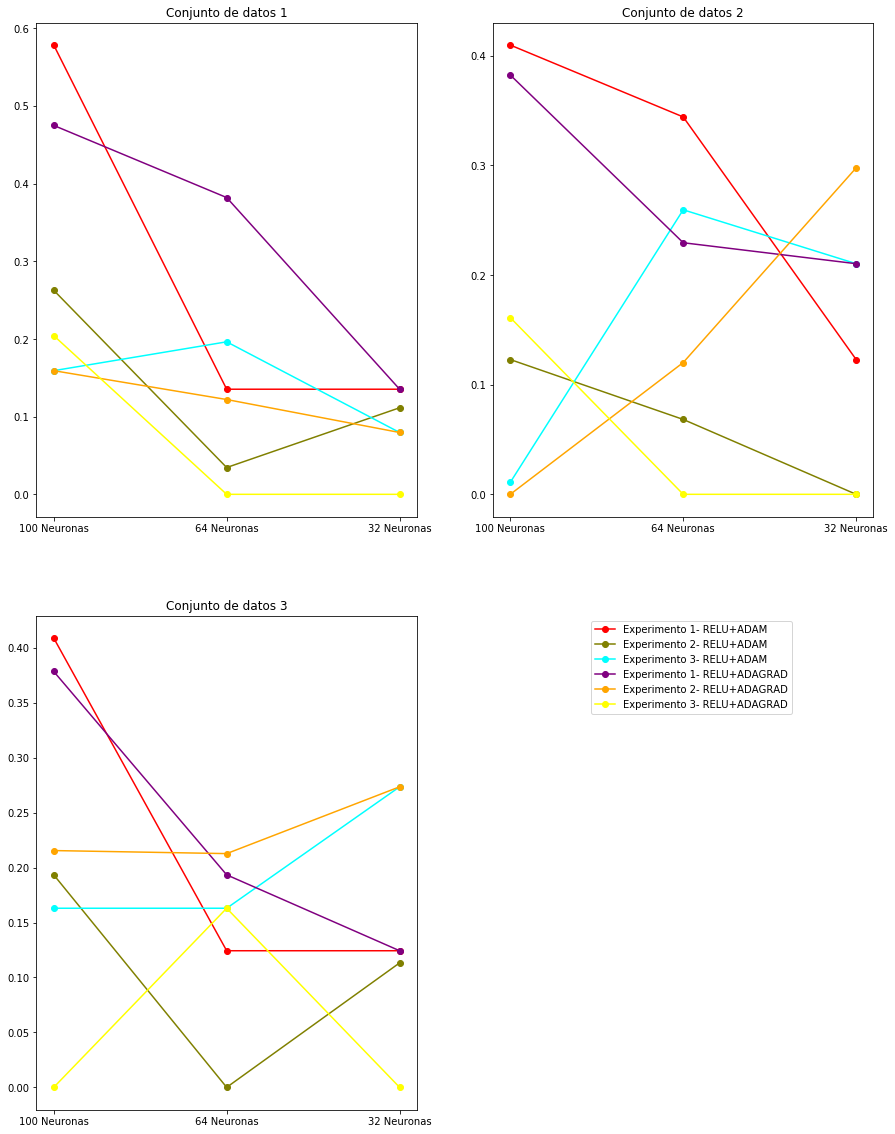

In [11]:
fig = plt.figure(figsize=(15,20))
fig.add_subplot(2,2,1)
plt.plot(df1.loc['Experimento 1- RELU+ADAM'],'o-',label ='Experimento 1- RELU+ADAM',color ='red')
plt.plot(df1.loc['Experimento 2- RELU+ADAM'],'o-',label ='Experimento 2- RELU+ADAM',color ='olive')
plt.plot(df1.loc['Experimento 3- RELU+ADAM'],'o-',label ='Experimento 3- RELU+ADAM',color ='cyan')
plt.plot(df1.loc['Experimento 1- RELU+ADAGRAD'],'o-',label ='Experimento 1- RELU+ADAGRAD',color ='purple')
plt.plot(df1.loc['Experimento 2- RELU+ADAGRAD'],'o-',label ='Experimento 2- RELU+ADAGRAD',color ='orange')
plt.plot(df1.loc['Experimento 3- RELU+ADAGRAD'],'o-',label ='Experimento 3- RELU+ADAGRAD',color ='yellow')
plt.title('Conjunto de datos 1')
fig.add_subplot(2,2,2)
plt.plot(df2.loc['Experimento 1- RELU+ADAM'],'o-',label ='Experimento 1- RELU+ADAM' ,color ='red')
plt.plot(df2.loc['Experimento 2- RELU+ADAM'],'o-',label ='Experimento 2- RELU+ADAM',color ='olive')
plt.plot(df2.loc['Experimento 3- RELU+ADAM'],'o-',label ='Experimento 3- RELU+ADAM',color ='cyan')
plt.plot(df2.loc['Experimento 1- RELU+ADAGRAD'],'o-',label ='Experimento 1- RELU+ADAGRAD',color ='purple')
plt.plot(df2.loc['Experimento 2- RELU+ADAGRAD'],'o-',label ='Experimento 2- RELU+ADAGRAD',color ='orange')
plt.plot(df2.loc['Experimento 3- RELU+ADAGRAD'],'o-',label ='Experimento 3- RELU+ADAGRAD',color ='yellow')
plt.title('Conjunto de datos 2')
fig.add_subplot(2,2,3)
plt.plot(df3.loc['Experimento 1- RELU+ADAM'],'o-',label ='Experimento 1- RELU+ADAM',color ='red')
plt.plot(df3.loc['Experimento 2- RELU+ADAM'],'o-',label ='Experimento 2- RELU+ADAM',color ='olive')
plt.plot(df3.loc['Experimento 3- RELU+ADAM'],'o-',label ='Experimento 3- RELU+ADAM',color ='cyan')
plt.plot(df3.loc['Experimento 1- RELU+ADAGRAD'],'o-',label ='Experimento 1- RELU+ADAGRAD',color ='purple')
plt.plot(df3.loc['Experimento 2- RELU+ADAGRAD'],'o-',label ='Experimento 2- RELU+ADAGRAD',color ='orange')
plt.plot(df3.loc['Experimento 3- RELU+ADAGRAD'],'o-',label ='Experimento 3- RELU+ADAGRAD',color ='yellow')
plt.title('Conjunto de datos 3')
plt.legend(bbox_to_anchor = (2, 1))